### Manipulate data from TOQUA ship

In [1]:
import pandas as pd

df = pd.read_csv("../Toqua_API/recipes/data/ship_data.csv", parse_dates=["datetime_end"])
df

datetime_end  voyage        stw  me_fo_consumption  \
0     2022-06-24 22:45:00+00:00       1  12.736735          51.056979   
1     2022-06-24 23:00:00+00:00       1  11.912045          46.441744   
2     2022-06-24 23:15:00+00:00       1  13.043936          48.837654   
3     2022-06-24 23:30:00+00:00       1  12.340733          46.220231   
4     2022-06-24 23:45:00+00:00       1  12.867363          44.134012   
...                         ...     ...        ...                ...   
31945 2023-05-23 17:00:00+00:00      11  12.106177          29.341714   
31946 2023-05-23 17:15:00+00:00      11  13.274439          36.390085   
31947 2023-05-23 17:30:00+00:00      11  13.459992          38.990243   
31948 2023-05-23 17:45:00+00:00      11  12.720441          34.616783   
31949 2023-05-23 18:00:00+00:00      11  13.161837          37.028321   

       ship_heading  wind_direction  wind_speed  wave_direction  wave_height  \
0        116.834744      256.825078    4.652994      167.403422     1.808797   
1         97.254636      170.989375    4.937206      161.889526     2.046644   
2        192.273266      -23.061444    4.768308      250.303015     0.390783   
3        158.798366      210.453751    3.023702      230.254281     1.296289   
4        104.596701      175.070960    5.494352      188.850350     0.912953   
...             ...             ...         ...             ...          ...   
31945    247.211329      120.444830    7.266383      193.127350     1.548775   
31946    342.079971      109.189566    7.885734      242.281907     1.818478   
31947    256.667607      103.239181    6.589824      212.017387     1.508247   
31948    269.605791      135.022811    7.284068      175.945316     1.956245   
31949    306.750306       87.565056    6.327873      190.728030     1.919243   

       current_speed  current_direction  fuel_specific_energy  draft_avg  \
0           0.174668           1.132839             41.500563  19.199545   
1           0.170478         104.104376             41.500402  19.199505   
2           0.599106         218.323053             41.500723  19.199856   
3          -0.142017          51.892648             41.498476  19.200029   
4           0.526234         244.260118             41.499404  19.198857   
...              ...                ...                   ...        ...   
31945       0.241010         144.109422             41.499693   9.500587   
31946       0.436219          89.660876             41.500398   9.498560   
31947       0.093702         180.322267             41.499994   9.499034   
31948       0.095444          95.676050             41.498040   9.499939   
31949       0.231607         150.171653             41.499354   9.499044   

         sea_depth  
0      1754.005338  
1       848.125564  
2     -1114.681358  
3      1357.116871  
4       693.841692  
...            ...  
31945  4421.447117  
31946  4176.561835  
31947  3604.806021  
31948  3918.618366  
31949  5235.721062  

[31950 rows x 14 columns]

In [2]:
df.head()
#'voyage', 'stw', 'ship_heading', 'wind_direction', 'wind_speed', 'wave_direction', 'wave_height', 'current_speed', 'current_direction', 'draft_avg'

datetime_end  voyage        stw  me_fo_consumption  \
0 2022-06-24 22:45:00+00:00       1  12.736735          51.056979   
1 2022-06-24 23:00:00+00:00       1  11.912045          46.441744   
2 2022-06-24 23:15:00+00:00       1  13.043936          48.837654   
3 2022-06-24 23:30:00+00:00       1  12.340733          46.220231   
4 2022-06-24 23:45:00+00:00       1  12.867363          44.134012   

   ship_heading  wind_direction  wind_speed  wave_direction  wave_height  \
0    116.834744      256.825078    4.652994      167.403422     1.808797   
1     97.254636      170.989375    4.937206      161.889526     2.046644   
2    192.273266      -23.061444    4.768308      250.303015     0.390783   
3    158.798366      210.453751    3.023702      230.254281     1.296289   
4    104.596701      175.070960    5.494352      188.850350     0.912953   

   current_speed  current_direction  fuel_specific_energy  draft_avg  \
0       0.174668           1.132839             41.500563  19.199545   
1       0.170478         104.104376             41.500402  19.199505   
2       0.599106         218.323053             41.500723  19.199856   
3      -0.142017          51.892648             41.498476  19.200029   
4       0.526234         244.260118             41.499404  19.198857   

     sea_depth  
0  1754.005338  
1   848.125564  
2 -1114.681358  
3  1357.116871  
4   693.841692

In [3]:
# Get unique values from the "voyage" column
unique_voyages = df["voyage"].unique()
unique_voyages

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
df_events = pd.read_csv("../Toqua_API/recipes/data/ship_events.csv", parse_dates=["datetime"])
df_events

datetime           type
0 2022-06-25  hull_cleaning
1 2023-05-08       dry_dock

Text(2022-09-12 00:00:00, 1.03, 'training period')

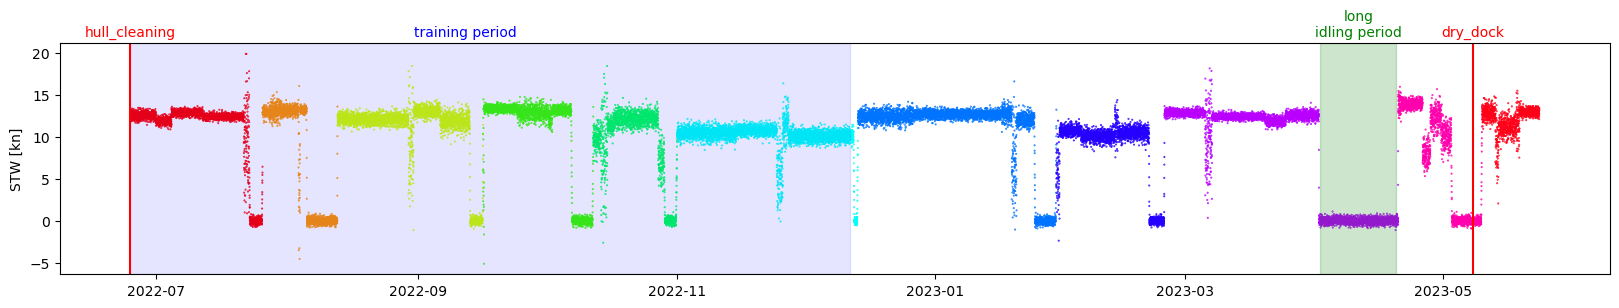

In [5]:
import matplotlib.pyplot as plt
from datetime import datetime

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))
ax.scatter(df["datetime_end"], df["stw"], c=df["voyage"], s=0.2, cmap='hsv')
ax.set_ylabel("STW [kn]")
for event in df_events.itertuples():
    ax.axvline(event.datetime, color="red")
    ax.text(event.datetime, y=1.03, s=event.type, color="red", transform=ax.get_xaxis_transform(), horizontalalignment='center')
    
ax.axvspan("2023-04-02", "2023-04-20", color="green", alpha=0.2)
ax.text(datetime.strptime("2023-04-11", "%Y-%m-%d"), y=1.03, s="long\nidling period", transform=ax.get_xaxis_transform(), horizontalalignment='center', color='green')

ax.axvspan("2022-06-25", "2022-12-12", color="blue", alpha=0.1)
ax.text(datetime.strptime("2022-09-12", "%Y-%m-%d"), y=1.03, s="training period", transform=ax.get_xaxis_transform(), horizontalalignment='center', color='blue')

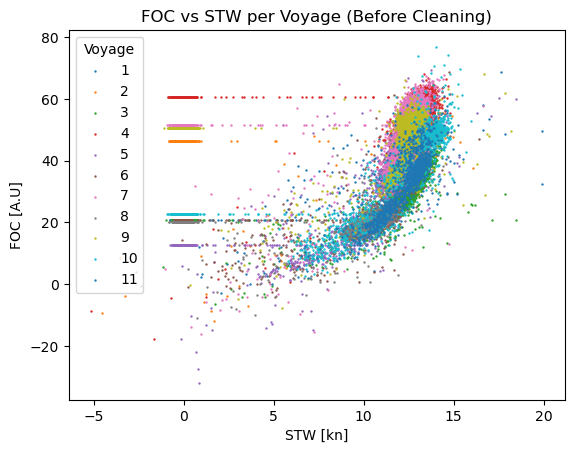

In [6]:
# Iterate over unique values and plot data for each category
for voyage in unique_voyages:
    subset = df[df["voyage"] == voyage]
    plt.scatter(subset["stw"], subset["me_fo_consumption"], s=0.5, label=str(voyage))

# Add labels and title
plt.xlabel("STW [kn]")
plt.ylabel("FOC [A.U]")

plt.title("FOC vs STW per Voyage (Before Cleaning)")

# Add legend
plt.legend(title="Voyage")

# Show the plot
plt.show()

## Filtering outliers

Outliers are data points that are significantly different from the rest of the data. They can be caused by sensor errors, human errors, or other external factors. We can filters outliers using advanced outlier detection algorithms, or by applying simple thresholds.

In this case, we will apply a set of very simple thresholds. These thresholds filter out data points that are obviously erroneous. 
For example: directions must be between 0 and 360 degrees, fuel consumption cannot be below 0 and sea depth cannot be below 0.

In [7]:
outlier_filters = [
    "stw > 0",
    "me_fo_consumption > 0",
    "fuel_specific_energy > 40",
    "9 < draft_avg < 20",
    "0 < ship_heading < 360",
    "0 < wind_direction < 360",
    "wind_speed > 0",
    "0 < wave_direction < 360",
    "wave_height > 0",
    "0 < current_direction < 360",
    "current_speed > 0",
    "sea_depth > 0",
]

for f in outlier_filters:
    df = df.query(f)

#### Filtering unaccounted for external effects
In this case, our Ship Kernel takes into acount all parameters of the dataset except sea depth. I.e. sea depth is not an input of the model. However, a shallow sea does result in a perceived decrease in performance due to additional drag. As this effect is not accounted for by the model we will filter out samples with a sea depth below 3 * the draft.

In [8]:
external_effect_filters = [
    "sea_depth > 3 * draft_avg"
]

for f in external_effect_filters:
    df = df.query(f)

#### Constraining to sea-going conditions

Finally, we remove any conditions during which the vessel is not in normal operation conditions (e.g. during port stay, manoeuvring, etc.).
For this we will use the following filters:
* Speed > 5 kn
* Fuel Consumption > 5 mt/day

In [9]:
sea_condition_filters = [
    "stw > 5",
    "me_fo_consumption > 5",
]

for f in sea_condition_filters:
    df = df.query(f)

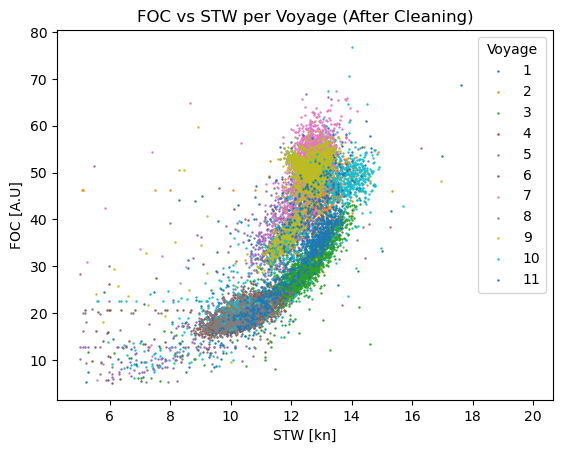

In [10]:
# Iterate over unique values and plot data for each category
for voyage in unique_voyages:
    subset = df[df["voyage"] == voyage]
    plt.scatter(subset["stw"], subset["me_fo_consumption"], s=0.5, label=str(voyage))

# Add labels and title
plt.xlabel("STW [kn]")
plt.ylabel("FOC [A.U]")
plt.title("FOC vs STW per Voyage (After Cleaning)")

# Add legend
plt.legend(title="Voyage")

# Show the plot
plt.show()

In [25]:
subset_train = df[df["voyage"] != 11]

In [26]:
subset_train.voyage.unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10])

## Automatic Relevance Determination Rational Quadratic Kernel (ARD RQ) 

In [27]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RationalQuadratic, RBF



# Assuming 'X' is your input data (speed and environmental conditions) and 'y' is fuel consumption
kernel = RationalQuadratic(length_scale=1.0, alpha=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

X = subset_train[['stw', 'ship_heading', 'wind_direction', 'wind_speed', 'wave_direction', 'wave_height', 'current_speed', 'current_direction', 'draft_avg']].values
y = subset_train['me_fo_consumption'].values # Reshape for single output
# Fit the Gaussian process model to your data
gp.fit(X, y)


GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1),
                         n_restarts_optimizer=10)

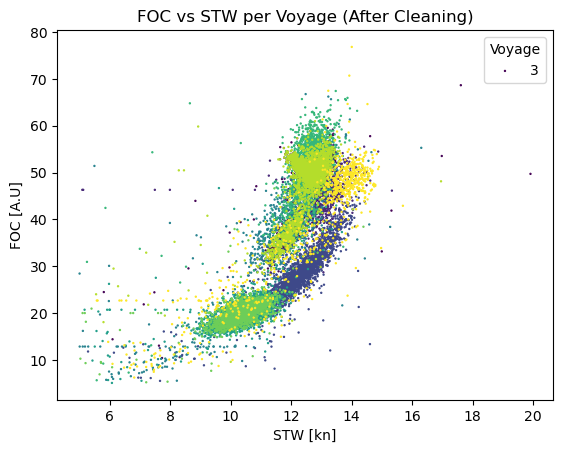

In [31]:
plt.scatter(subset_train["stw"], subset_train["me_fo_consumption"], c=subset_train["voyage"], s=0.5, label=str(voyage))
# Add labels and title
plt.xlabel("STW [kn]")
plt.ylabel("FOC [A.U]")
plt.title("FOC vs STW per Voyage (After Cleaning)")
plt.legend(title="Voyage")# Add legend
plt.show()# Show the plot

In [52]:
from sklearn.metrics import mean_squared_error
voyage=11
subset_test = df[df["voyage"] == voyage]
X_test = subset_test[['stw', 'ship_heading', 'wind_direction', 'wind_speed', 'wave_direction', 'wave_height', 'current_speed', 'current_direction', 'draft_avg']].values
y_test = subset_test['me_fo_consumption'].values # Reshape for single output

# Step 4: Model Evaluation
# Make predictions on the testing set
y_pred = gp.predict(X_test)
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 173.10006065253995


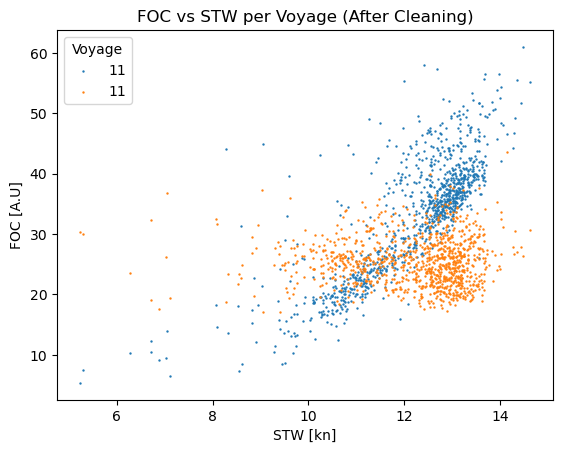

In [54]:
plt.scatter(subset_test["stw"], subset_test["me_fo_consumption"], s=0.5, label=str(voyage))
plt.scatter(subset_test["stw"], y_pred, s=0.5, label=str(voyage))
# Add labels and title
plt.xlabel("STW [kn]")
plt.ylabel("FOC [A.U]")
plt.title("FOC vs STW per Voyage (After Cleaning)")
plt.legend(title="Voyage")# Add legend
plt.show()# Show the plot

### Add features 

In [57]:
import math

# 'voyage', 'stw', 'ship_heading', 'wind_direction', 'wind_speed', 'wave_direction', 'wave_height', 'current_speed', 'current_direction', 'draft_avg'
# df['rad'] = df.apply(lambda row: row.angle*math.pi/180, axis=1)
# plt.polar(df['rad'], df['value'])
df['stw_pow2'] = df.apply(lambda row: row.stw*row.stw, axis=1)
df['ship_heading_rad'] = df.apply(lambda row: row.ship_heading*math.pi/180, axis=1)
df['wind_direction_rad'] = df.apply(lambda row: row.wind_direction*math.pi/180, axis=1)
df['wave_direction_rad'] = df.apply(lambda row: row.wave_direction*math.pi/180, axis=1)
df['current_direction_rad'] = df.apply(lambda row: row.current_direction*math.pi/180, axis=1)
df['rel_wind_direction_rad'] = df.apply(lambda row: (row.ship_heading-row.wind_direction)*math.pi/180, axis=1)
df['rel_wave_direction_rad'] = df.apply(lambda row: (row.ship_heading-row.wave_direction)*math.pi/180, axis=1)
df['rel_current_direction_rad'] = df.apply(lambda row: (row.ship_heading-row.current_direction)*math.pi/180, axis=1)

df['rel_wave_sway'] = df.apply(lambda row: row.wave_height*math.sin(row.rel_wave_direction_rad), axis=1)
df['rel_wave_surge'] = df.apply(lambda row: row.wave_height*math.cos(row.rel_wave_direction_rad), axis=1)

df['rel_current_sway'] = df.apply(lambda row: row.current_speed*math.sin(row.rel_current_direction_rad), axis=1)
df['rel_current_surge'] = df.apply(lambda row: row.current_speed*math.cos(row.rel_current_direction_rad), axis=1)

df['rel_wind_sway'] = df.apply(lambda row: row.wind_speed*math.sin(row.rel_wind_direction_rad), axis=1)
df['rel_wind_surge'] = df.apply(lambda row: row.wind_speed*math.sin(row.rel_wind_direction_rad), axis=1)

# no swell data 

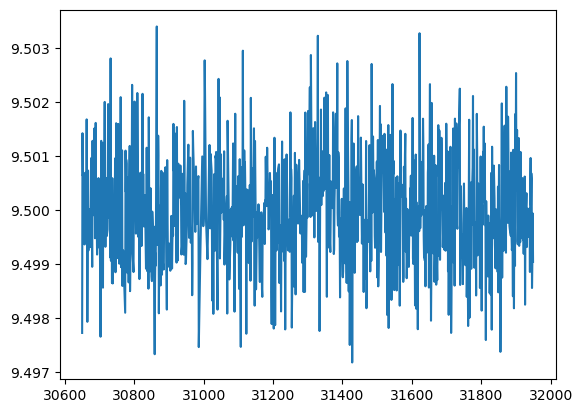

In [52]:
voyage=11
subset = df[df["voyage"] == voyage]#.head()
# plt.polar(subset['ship_heading_rad'], subset['ship_heading_rad']/subset['ship_heading_rad'])
# plt.polar(subset['wind_direction_rad'], subset['wind_speed'])
# plt.polar(subset['wave_direction_rad'], subset['wave_height'])
# plt.polar(subset['current_direction_rad'], subset['current_speed'])
# plt.polar(subset['rel_wind_direction_rad'], subset['wind_speed'])
# plt.polar(subset['rel_wave_direction_rad'], subset['wave_height'])
# plt.polar(subset['rel_current_direction_rad'], subset['current_speed'])
# plt.plot(subset['wind_direction_rad'])
plt.figure(figsize=(15, 5))
plt.plot(subset['draft_avg'])

In [58]:
df.columns

Index(['datetime_end', 'voyage', 'stw', 'me_fo_consumption', 'ship_heading',
       'wind_direction', 'wind_speed', 'wave_direction', 'wave_height',
       'current_speed', 'current_direction', 'fuel_specific_energy',
       'draft_avg', 'sea_depth', 'stw_pow2', 'ship_heading_rad',
       'wind_direction_rad', 'wave_direction_rad', 'current_direction_rad',
       'rel_wind_direction_rad', 'rel_wave_direction_rad',
       'rel_current_direction_rad', 'rel_wave_sway', 'rel_wave_surge',
       'rel_current_sway', 'rel_current_surge', 'rel_wind_sway',
       'rel_wind_surge'],
      dtype='object')

In [70]:
intersting_features=['stw', 'stw_pow2', 'ship_heading','wind_direction', 'wind_speed', 'wave_direction', 'wave_height',
      'current_speed', 'current_direction', 'fuel_specific_energy','draft_avg', 'sea_depth', 
      'ship_heading_rad','wind_direction_rad', 'wave_direction_rad', 'current_direction_rad',
      'rel_wind_direction_rad', 'rel_wave_direction_rad','rel_current_direction_rad', 'rel_wave_sway', 'rel_wave_surge',
      'rel_current_sway', 'rel_current_surge', 'rel_wind_sway','rel_wind_surge', 'me_fo_consumption','voyage']

In [71]:
DOI_df=df[intersting_features]

In [72]:
DOI_df.head()

stw    stw_pow2  ship_heading  wind_direction  wind_speed  \
0  12.736735  162.224429    116.834744      256.825078    4.652994   
1  11.912045  141.896814     97.254636      170.989375    4.937206   
4  12.867363  165.569026    104.596701      175.070960    5.494352   
5  13.127003  172.318208    108.137846      151.958510    5.030150   
7  12.805225  163.973775    100.608977      101.317788    1.837049   

   wave_direction  wave_height  current_speed  current_direction  \
0      167.403422     1.808797       0.174668           1.132839   
1      161.889526     2.046644       0.170478         104.104376   
4      188.850350     0.912953       0.526234         244.260118   
5      244.339703     2.011254       0.155586         303.411949   
7      183.162040     1.396002       0.148492         328.602293   

   fuel_specific_energy  ...  rel_wave_direction_rad  \
0             41.500563  ...               -0.882590   
1             41.500402  ...               -1.128092   
4             41.499404  ...               -1.470504   
5             41.499239  ...               -2.377171   
7             41.500284  ...               -1.440823   

   rel_current_direction_rad  rel_wave_sway  rel_wave_surge  rel_current_sway  \
0                   2.019379      -1.397091        1.148863          0.157387   
1                  -0.119551      -1.849340        0.876751         -0.020332   
4                  -2.437586      -0.908365        0.091409         -0.340619   
5                  -3.408176      -1.392029       -1.451688          0.040987   
7                  -3.979234      -1.384227        0.180933          0.110339   

   rel_current_surge  rel_wind_sway  rel_wind_surge  me_fo_consumption  voyage  
0          -0.075752      -2.991488       -2.991488          51.056979       1  
1           0.169261      -4.739596       -4.739596          46.441744       1  
4          -0.401124      -5.178379       -5.178379          44.134012       1  
5          -0.150091      -3.482893       -3.482893          49.974762       1  
7          -0.099373      -0.022726       -0.022726          48.126600       1  

[5 rows x 27 columns]

#### Split Train and test 

In [79]:
df_train = DOI_df[DOI_df["voyage"] != 11]
df_test = DOI_df[DOI_df["voyage"] == 11]

df_train.voyage.unique(),df_test.voyage.unique()

X_train=df_train.drop(["voyage", "me_fo_consumption"], axis=1)
y_train=df_train["me_fo_consumption"]

X_test=df_test.drop(["voyage", "me_fo_consumption"], axis=1)
y_test=df_test["me_fo_consumption"]

/tmp/ipykernel_5201/2875188659.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 3))


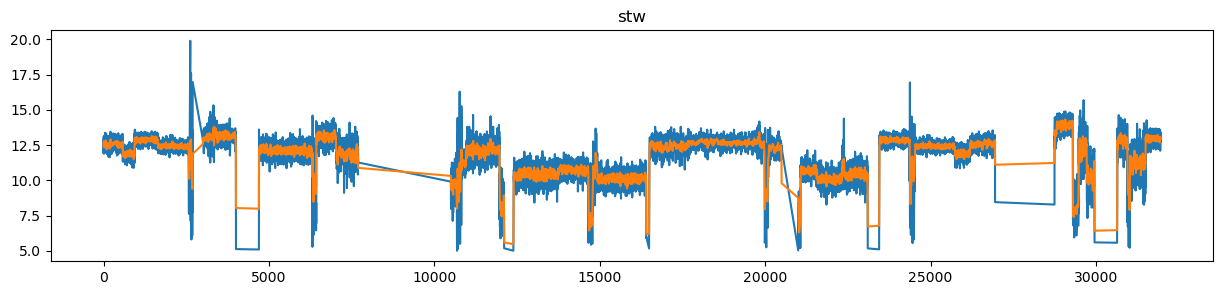

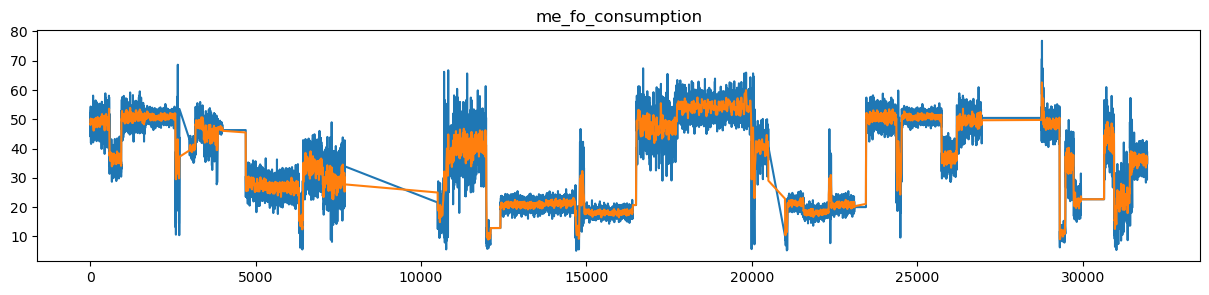

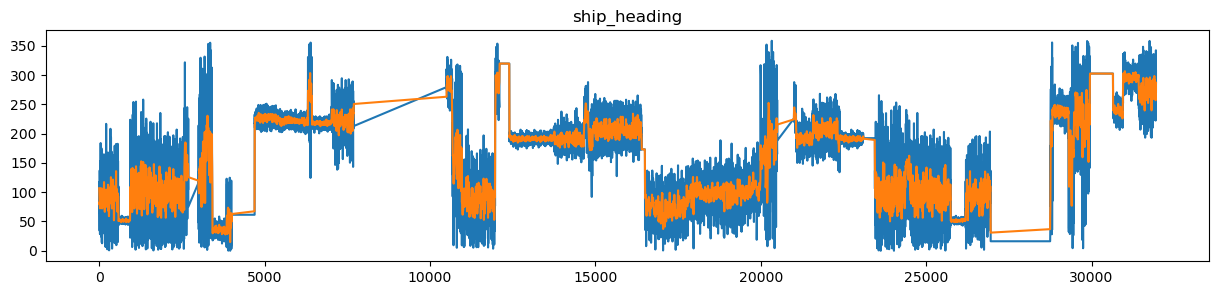

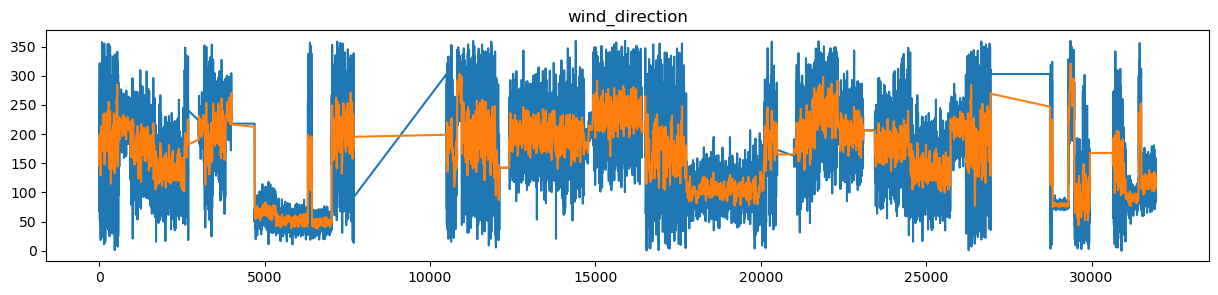

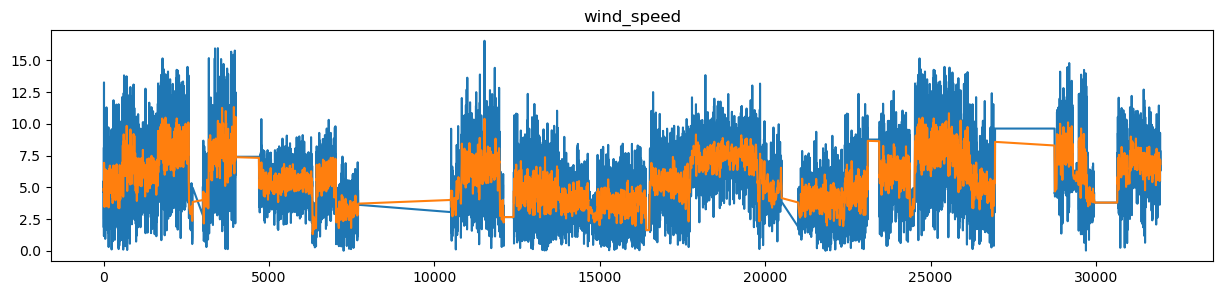

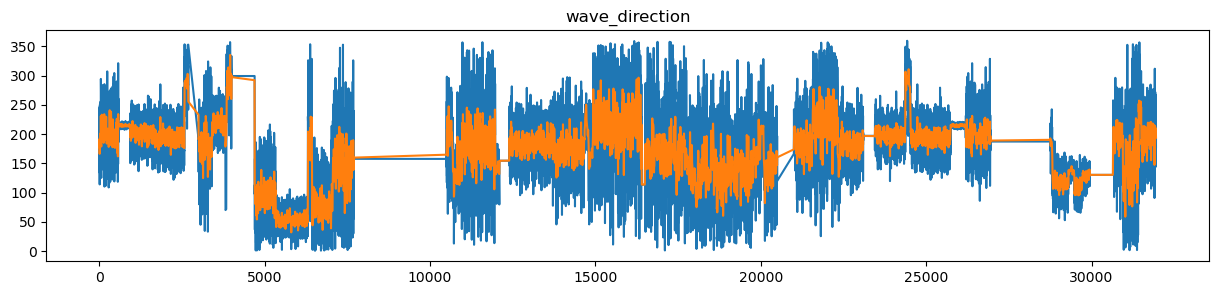

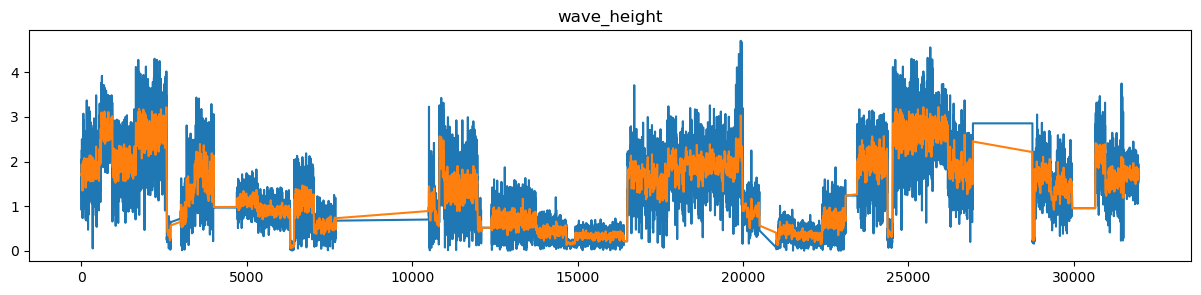

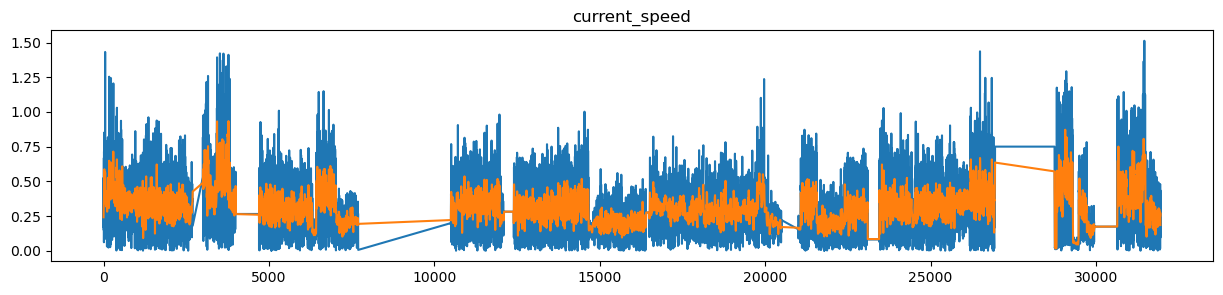

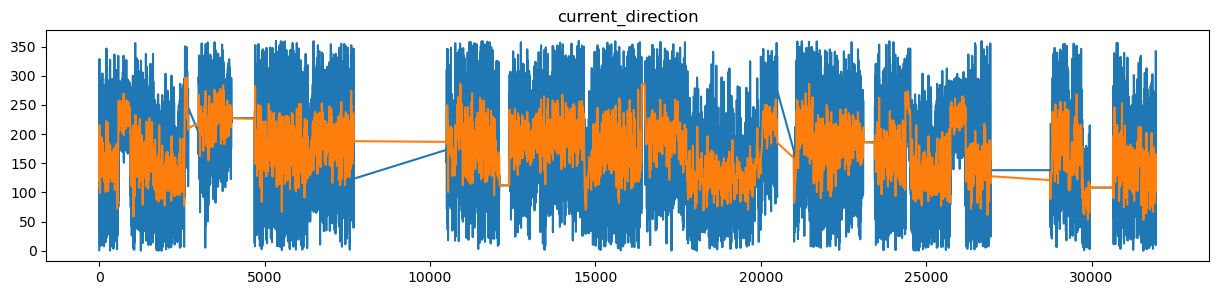

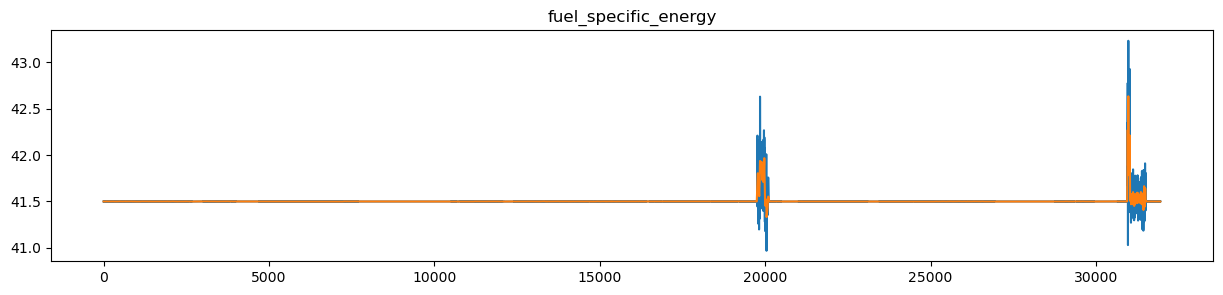

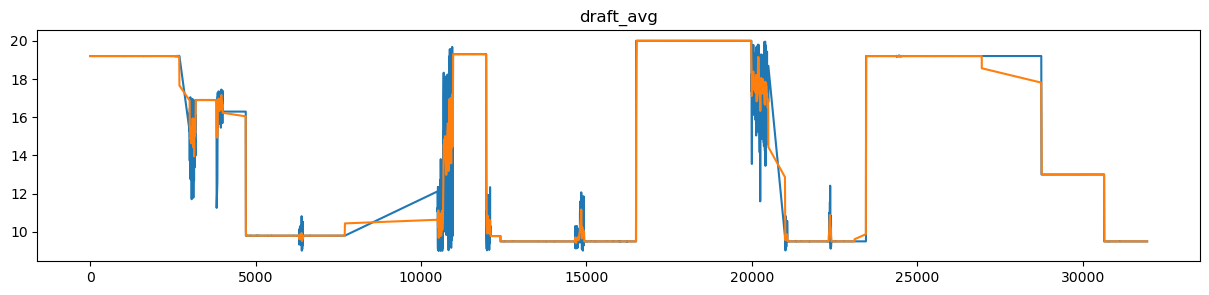

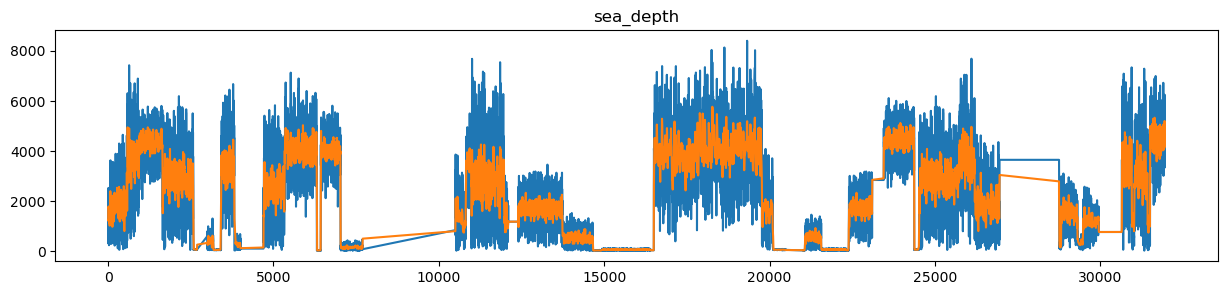

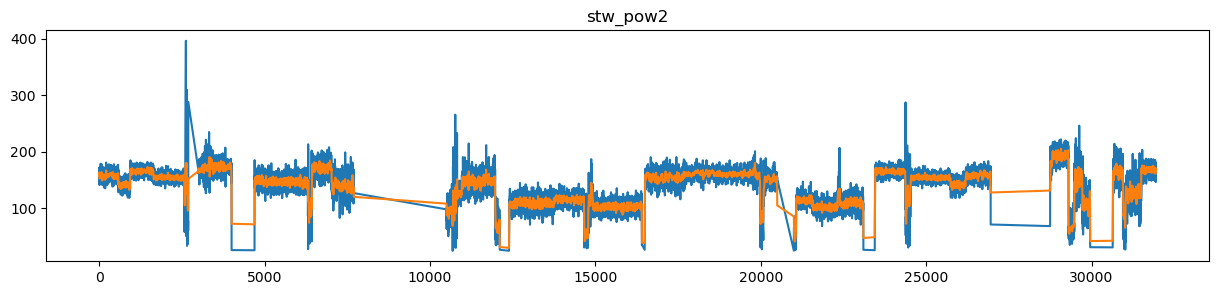

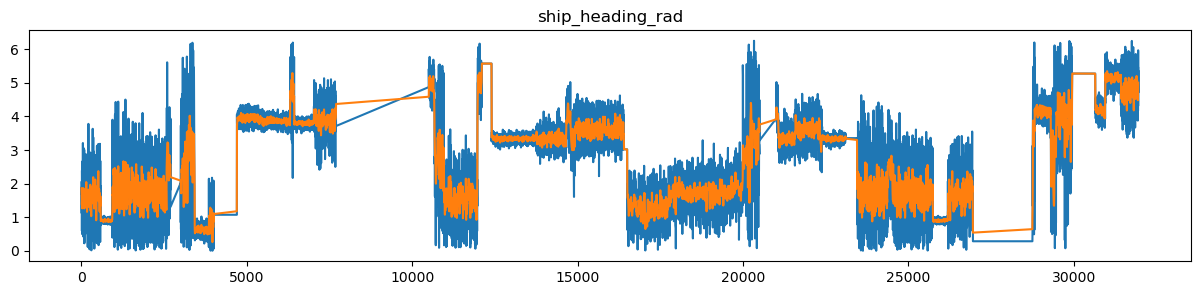

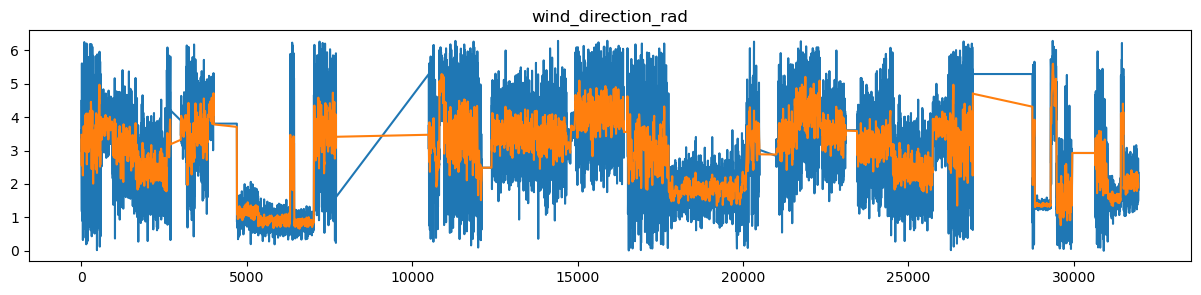

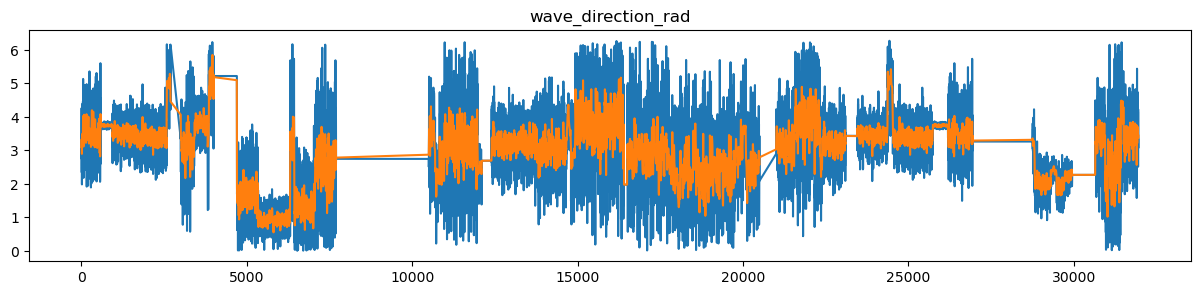

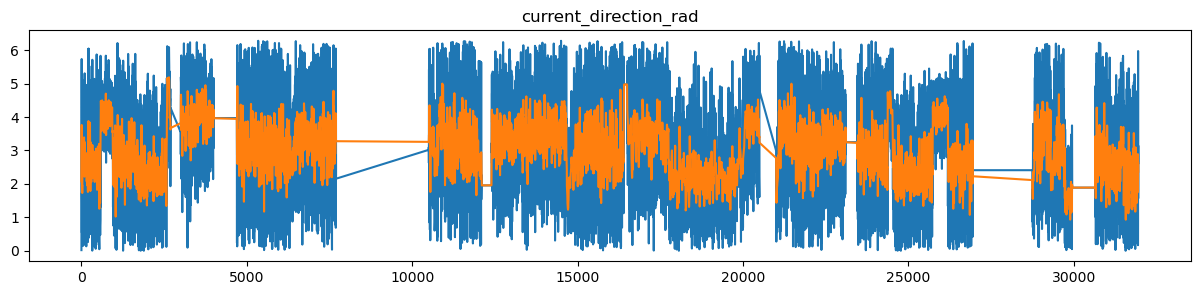

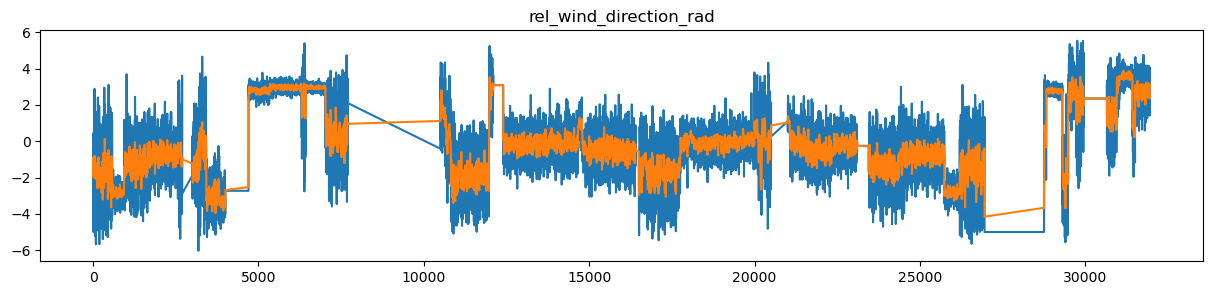

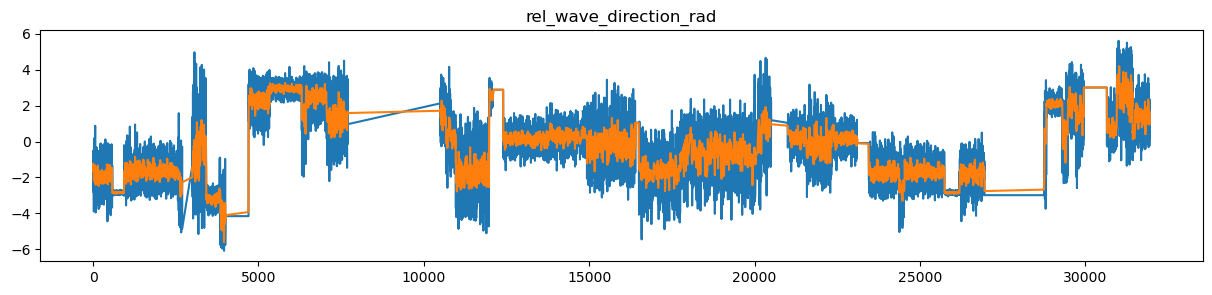

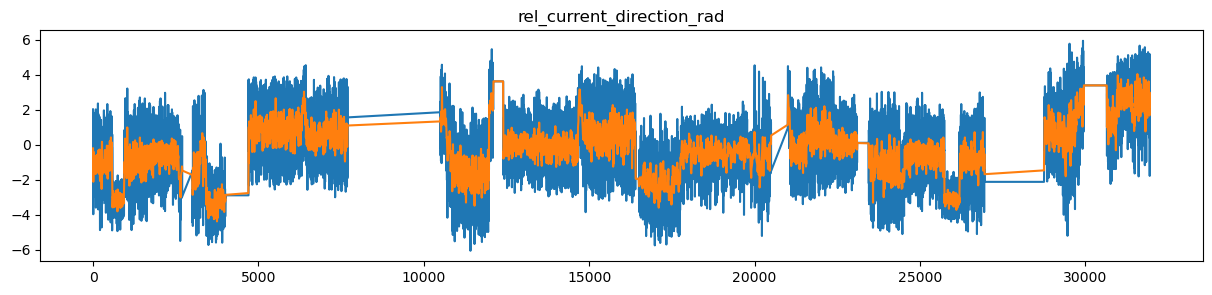

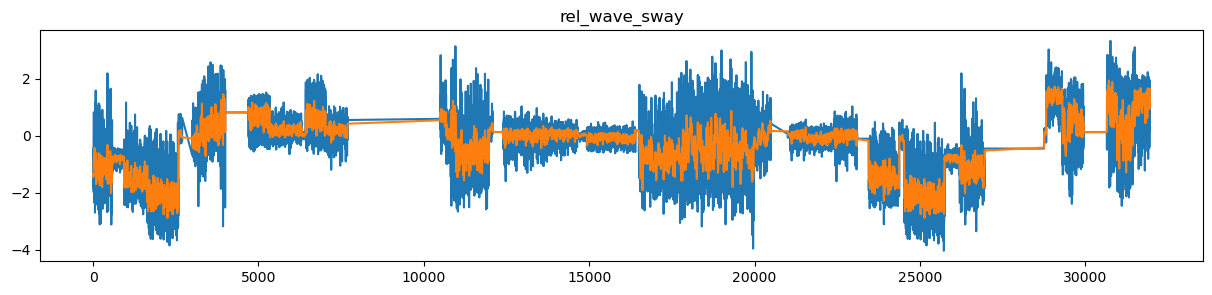

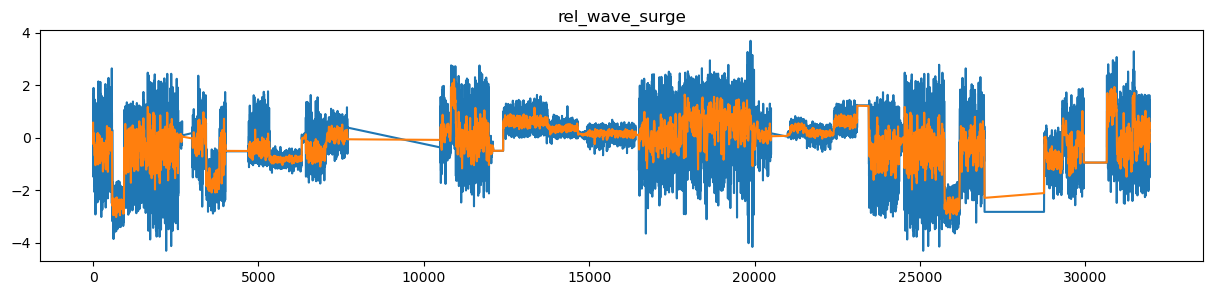

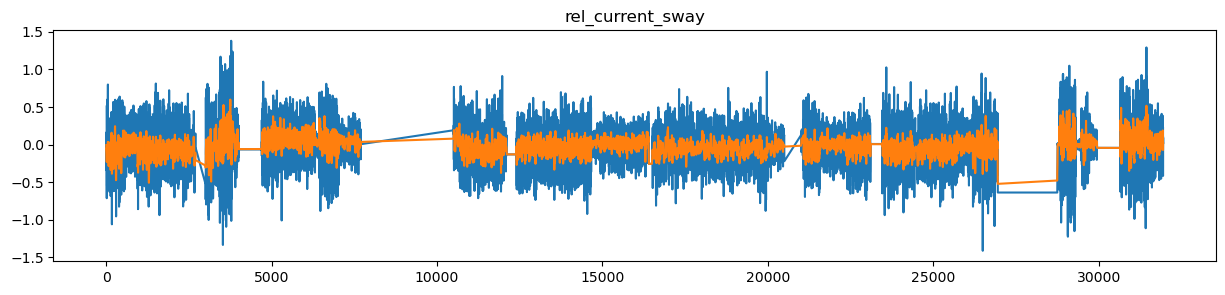

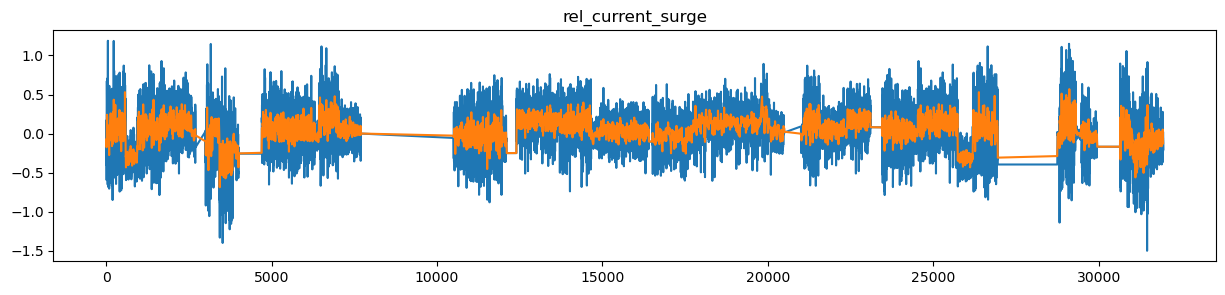

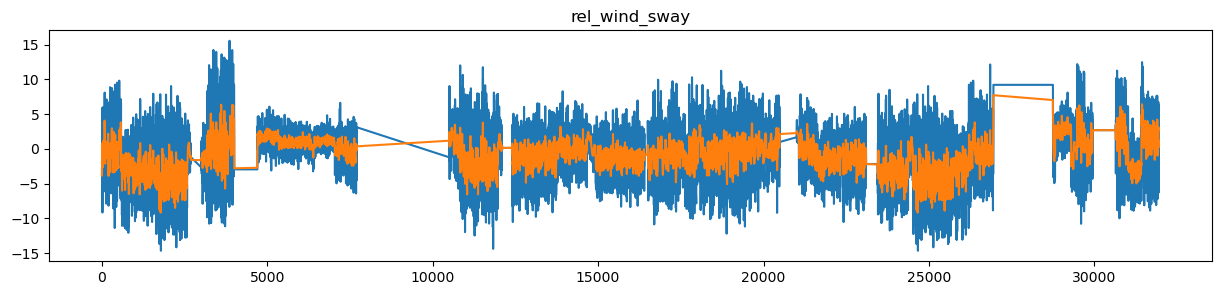

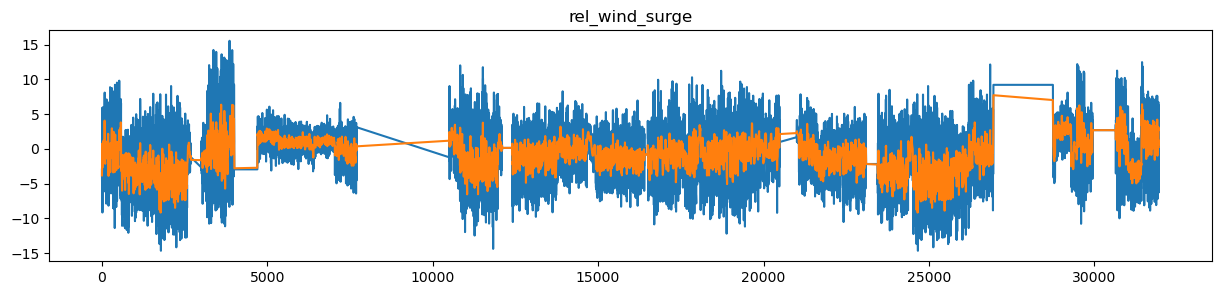

In [64]:
from scipy.ndimage import gaussian_filter1d
# Define the standard deviation for the Gaussian filter
sigma = 2
# Apply the Gaussian filter to the DataFrame
# subset_filtered = subset[['stw', 'ship_heading', 'wind_direction', 'wind_speed', 'wave_direction', 'wave_height', 'current_speed', 'current_direction', 'draft_avg']].apply(lambda col: gaussian_filter1d(col, sigma=sigma), axis=0)
subset_filtered = subset_df.apply(lambda col: gaussian_filter1d(col, sigma=sigma), axis=0)
for i in intersting_features:
    plt.figure(figsize=(15, 3))
    subset_df[i].plot()
    plt.plot(subset_filtered[i])
    plt.title(i)

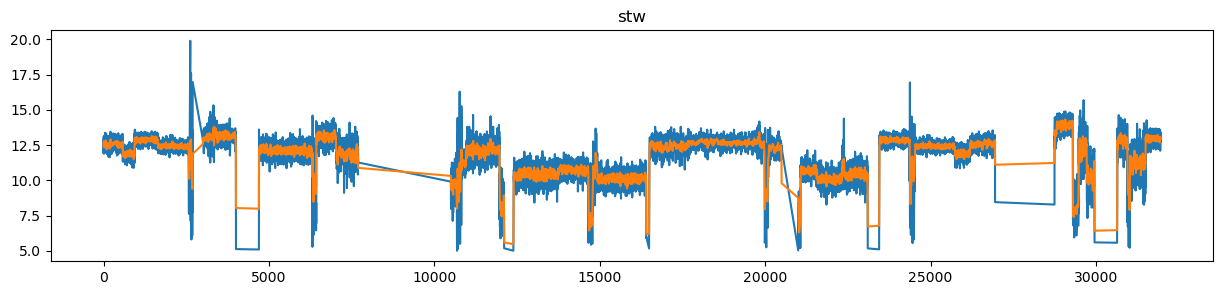

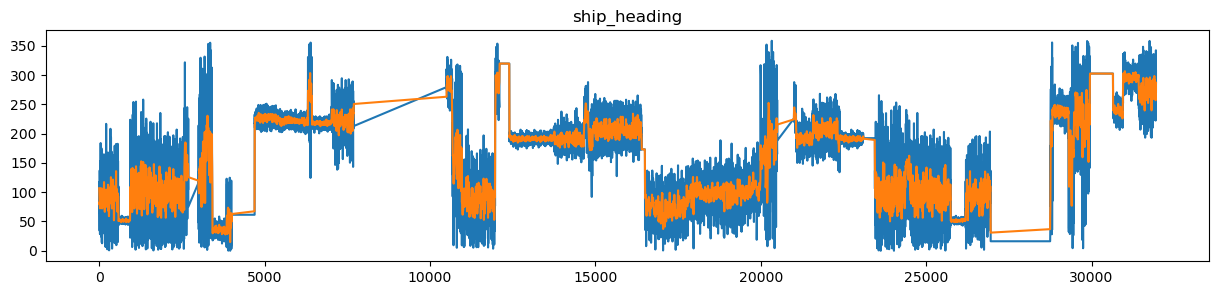

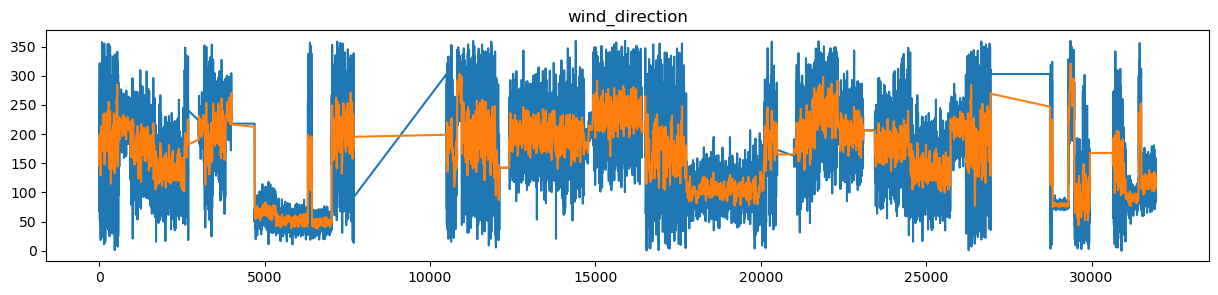

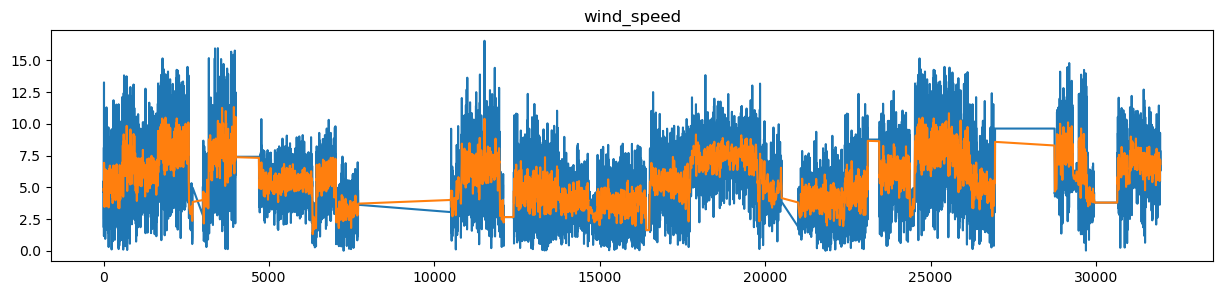

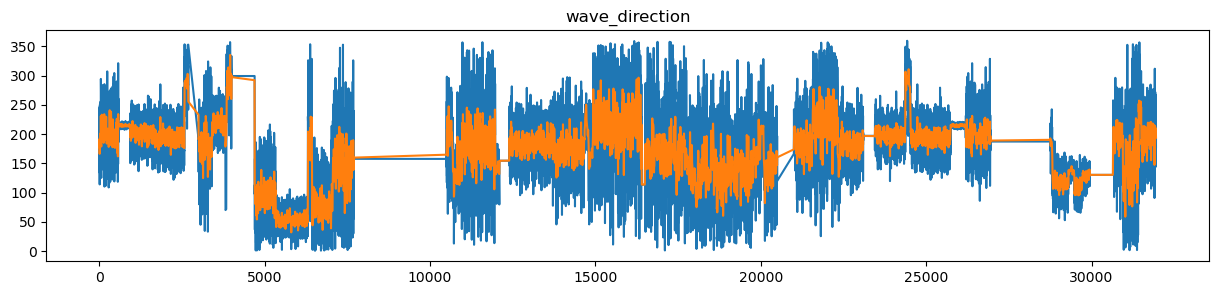

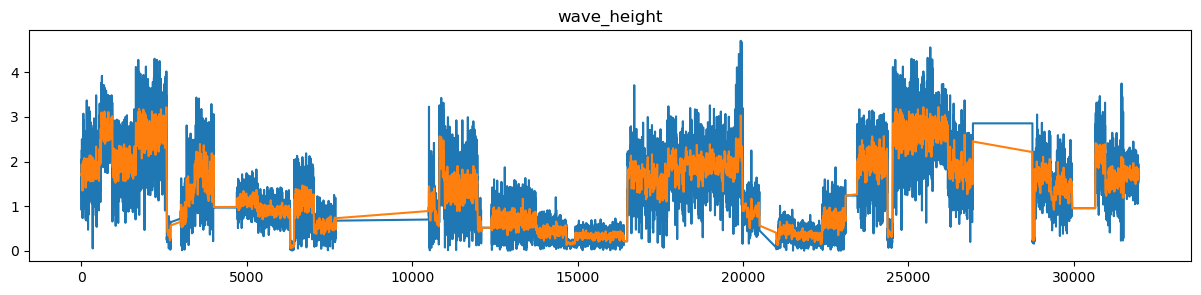

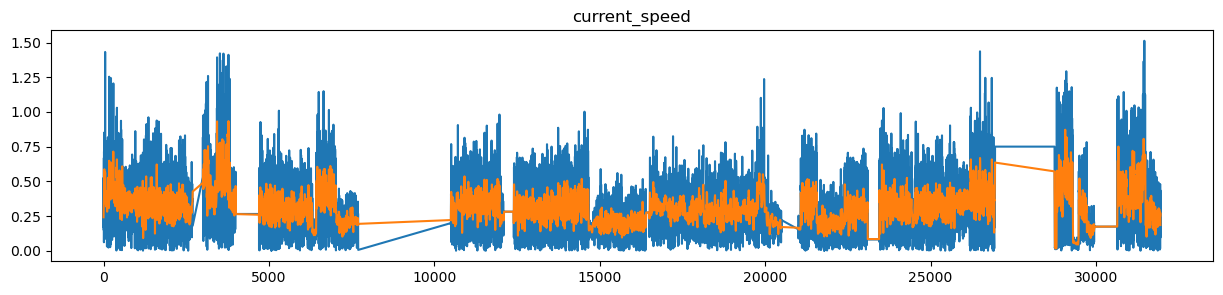

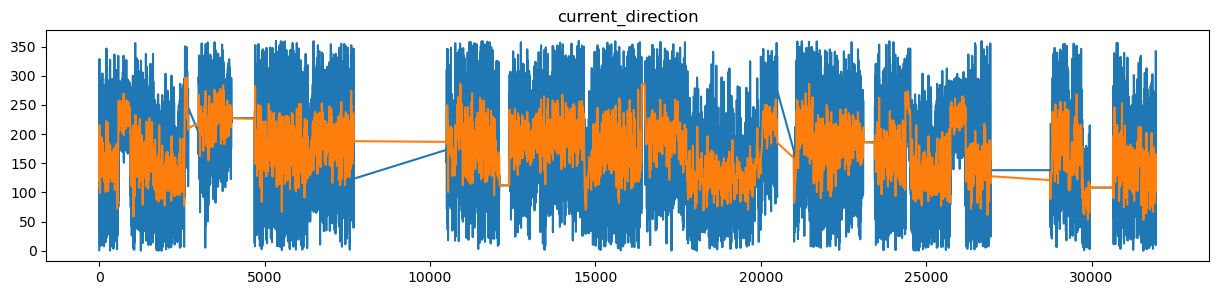

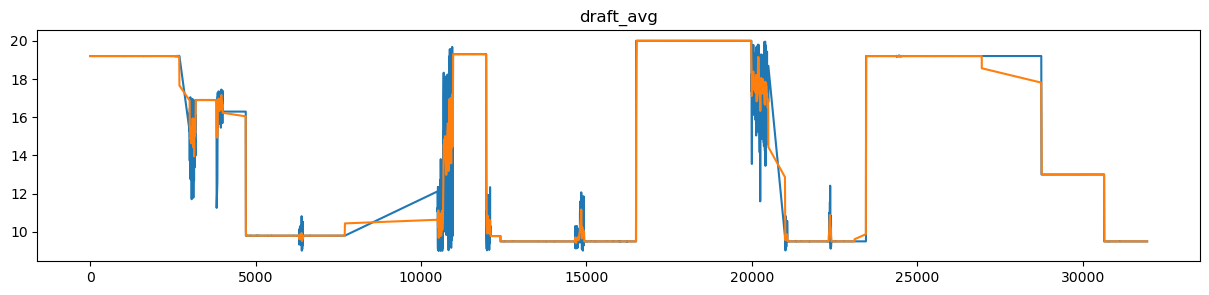

In [67]:
from scipy.ndimage import gaussian_filter1d
# Define the standard deviation for the Gaussian filter
sigma = 2
# Apply the Gaussian filter to the DataFrame
df_filtered = df[['stw', 'ship_heading', 'wind_direction', 'wind_speed', 'wave_direction', 'wave_height', 'current_speed', 'current_direction', 'draft_avg']].apply(lambda col: gaussian_filter1d(col, sigma=sigma), axis=0)
for i in ['stw', 'ship_heading', 'wind_direction', 'wind_speed', 'wave_direction', 'wave_height', 'current_speed', 'current_direction', 'draft_avg']:
    plt.figure(figsize=(15, 3))
    df[i].plot()
    plt.plot(df_filtered[i])
    plt.title(i)
    

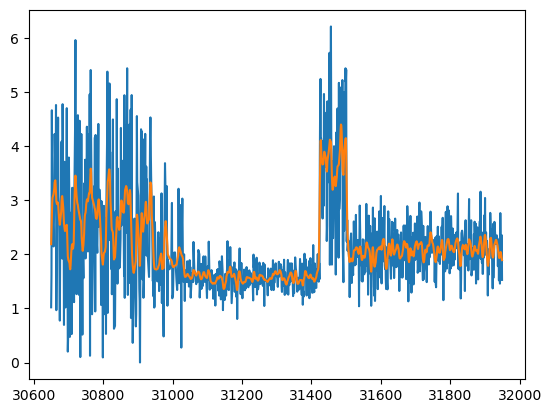

In [40]:
from scipy.ndimage import gaussian_filter1d
# Define the standard deviation for the Gaussian filter
sigma = 2

# Apply the Gaussian filter to the DataFrame
subset_filtered = subset[['wind_direction_rad']].apply(lambda col: gaussian_filter1d(col, sigma=sigma), axis=0)
plt.plot(subset['wind_direction_rad'])
plt.plot(subset_filtered['wind_direction_rad'])

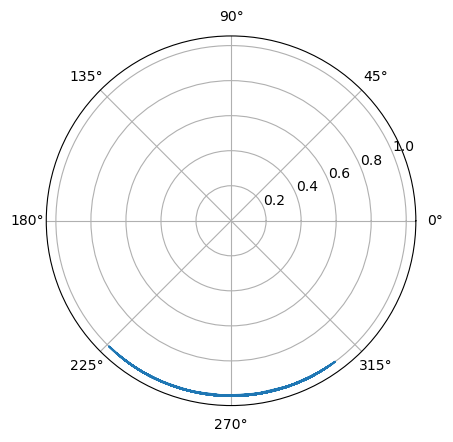

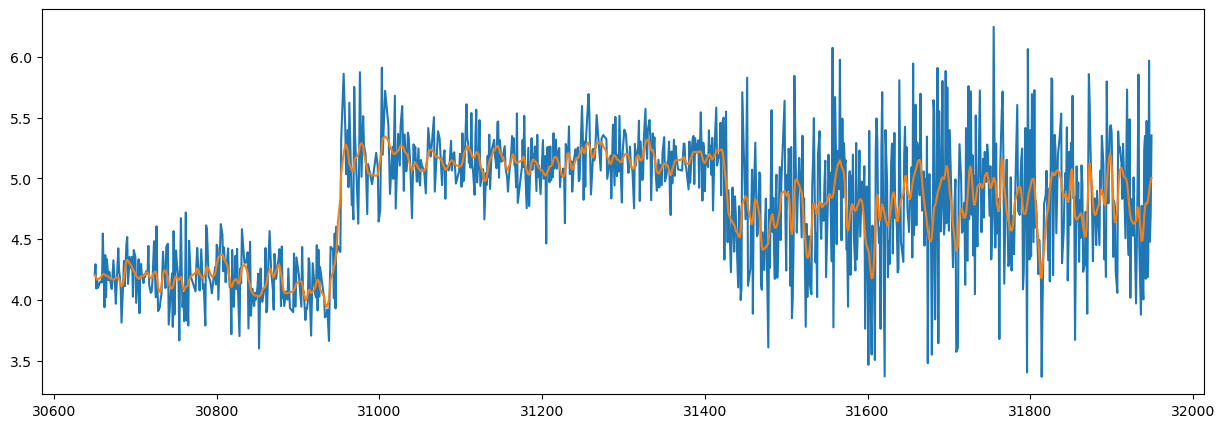

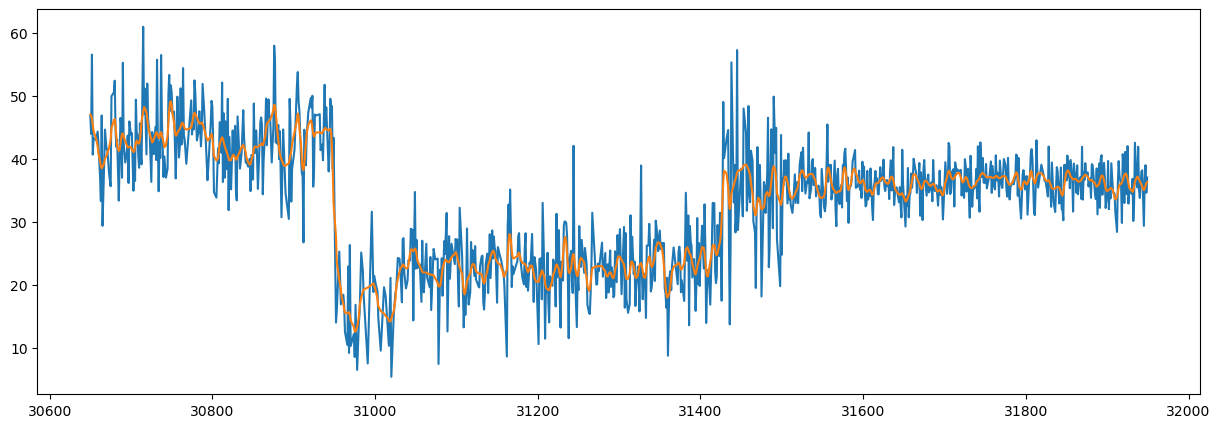

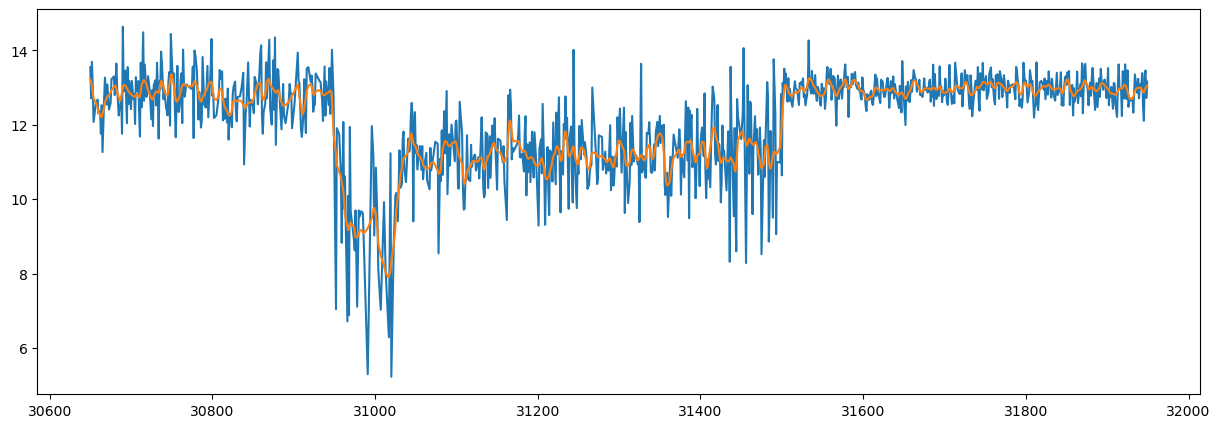

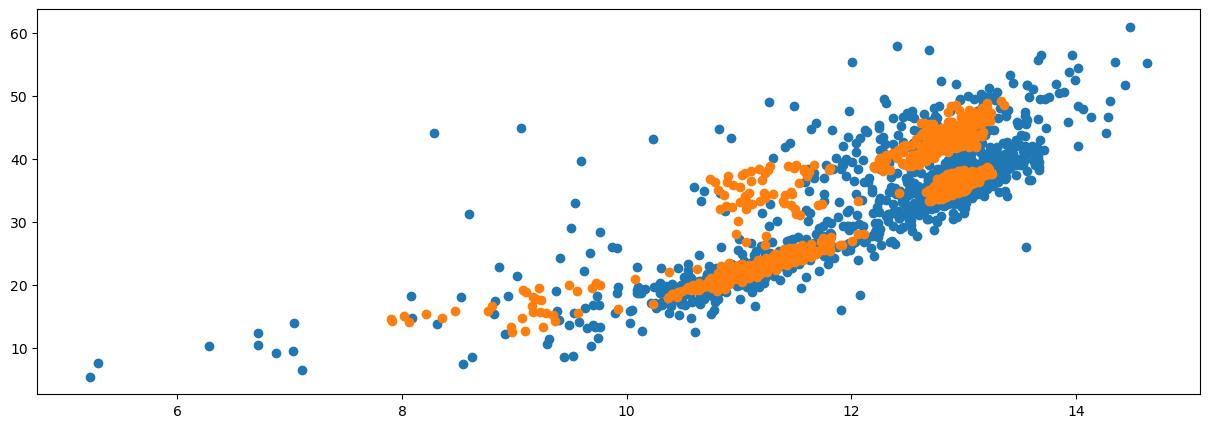

In [51]:
# Apply the Gaussian filter to the DataFrame
subset_filtered = subset[['stw','me_fo_consumption','ship_heading_rad']].apply(lambda col: gaussian_filter1d(col, sigma=sigma), axis=0)
plt.polar(subset_filtered['ship_heading_rad'], subset['ship_heading_rad']/subset['ship_heading_rad'])
plt.figure(figsize=(15, 5))
plt.plot(subset['ship_heading_rad'])
plt.plot(subset_filtered['ship_heading_rad'])

plt.figure(figsize=(15, 5))
plt.plot(subset['me_fo_consumption'])
plt.plot(subset_filtered['me_fo_consumption'])
plt.figure(figsize=(15, 5))
plt.plot(subset['stw'])
plt.plot(subset_filtered['stw'])
plt.figure(figsize=(15, 5))
plt.scatter(subset['stw'],subset['me_fo_consumption'])
plt.scatter(subset_filtered['stw'],subset_filtered['me_fo_consumption'])

## Training to Fit consumption

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import matplotlib.pyplot as plt


# At the start of your code
# device = torch.device("cpu" )
device = torch.device("cpu" if not torch.cuda.is_available() else "cuda")
torch.cuda.is_available()  # Check if we can use GPUs

True

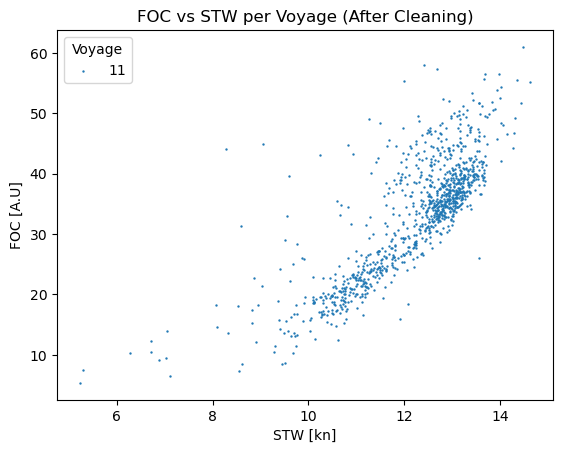

In [88]:
# Isolate trip and plot data 
# for voyage in unique_voyages:
voyage=11        # 11 is clean as well
subset = df[df["voyage"] == voyage]

plt.scatter(subset["stw"], subset["me_fo_consumption"], s=0.5, label=str(voyage))
plt.xlabel("STW [kn]")      # Add labels and title
plt.ylabel("FOC [A.U]")
plt.title("FOC vs STW per Voyage (After Cleaning)")
plt.legend(title="Voyage")  # Add legend
plt.show()                  # Show the plot

In [17]:

# Set the range [min_val, max_val)
min_val = subset["stw"].min()
max_val = subset["stw"].max()

# Number of points
n_pts = subset["stw"].count()

# Generate uniform random points in the specified range
uniform_points = min_val + (max_val - min_val) * torch.rand(n_pts, 1)

print(uniform_points)
A = 0.015 * uniform_points**3

tensor([[ 6.5008],
        [ 7.4613],
        [ 8.5247],
        [ 7.0723],
        [ 9.4381],
        [ 9.7707],
        [14.5471],
        [ 6.6165],
        [10.4601],
        [ 9.9056],
        [ 6.3050],
        [ 7.2898],
        [13.7680],
        [13.1529],
        [ 5.2362],
        [ 5.6784],
        [ 5.2576],
        [ 7.1851],
        [13.9978],
        [ 9.4960],
        [10.4645],
        [14.2037],
        [11.3324],
        [12.9531],
        [ 5.3041],
        [ 5.5753],
        [ 7.6409],
        [14.0360],
        [12.9899],
        [11.6579],
        [ 5.8762],
        [ 5.4268],
        [13.2147],
        [ 6.8396],
        [ 8.5541],
        [13.9916],
        [11.4059],
        [ 7.5696],
        [13.3064],
        [ 5.2637],
        [ 9.9206],
        [ 5.9289],
        [13.0130],
        [11.3457],
        [ 5.8897],
        [ 6.6248],
        [ 7.8802],
        [13.2273],
        [ 5.5739],
        [ 9.0055],
        [14.5099],
        [10.6220],
        [ 9.

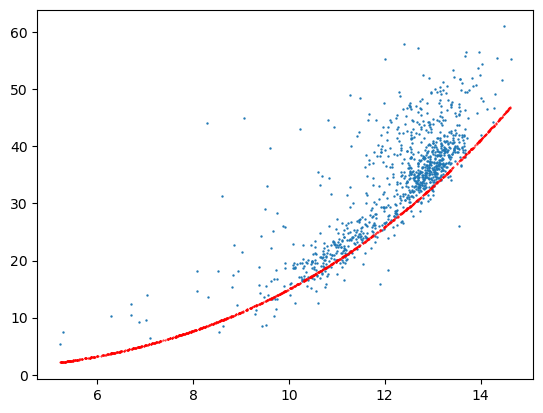

In [18]:
plt.scatter(subset["stw"], subset["me_fo_consumption"], s=0.5, label=str(voyage))
plt.scatter(uniform_points,A, s=0.2,c='red')

In [19]:
# # Convert DataFrame to PyTorch tensors
# features = torch.tensor(subset[['feature1', 'feature2']].values, dtype=torch.float32).view(-1, 1).to(device)    # df[['feature1', 'feature2']].values
# target = torch.tensor(subset['me_fo_consumption'].values, dtype=torch.float32).view(-1, 1).to(device)  # Reshape for single output

In [20]:
# Convert DataFrame to PyTorch tensors
# 'voyage', 'stw', 'ship_heading', 'wind_direction', 'wind_speed', 'wave_direction', 'wave_height', 'current_speed', 'current_direction', 'draft_avg'

features = torch.tensor(subset[['stw', 'ship_heading', 'wind_direction', 'wind_speed', 'wave_direction', 'wave_height', 'current_speed', 'current_direction', 'draft_avg']].values, dtype=torch.float32).to(device)    # df[['feature1', 'feature2']].values
target = torch.tensor(subset['me_fo_consumption'].values, dtype=torch.float32).view(-1, 1).to(device)  # Reshape for single output

In [21]:
features.size(), target.size()

(torch.Size([998, 9]), torch.Size([998, 1]))

Doing Iterations: 0 and Loss: 3238.5693359375
Doing Iterations: 100 and Loss: 88.02070617675781
Doing Iterations: 200 and Loss: 81.95480346679688
Doing Iterations: 300 and Loss: 73.76134490966797
Doing Iterations: 400 and Loss: 68.50899505615234
Doing Iterations: 500 and Loss: 58.6446647644043
Doing Iterations: 600 and Loss: 45.780967712402344
Doing Iterations: 700 and Loss: 36.963035583496094
Doing Iterations: 800 and Loss: 30.5026912689209
Doing Iterations: 900 and Loss: 25.744157791137695
Doing Iterations: 1000 and Loss: 22.625667572021484


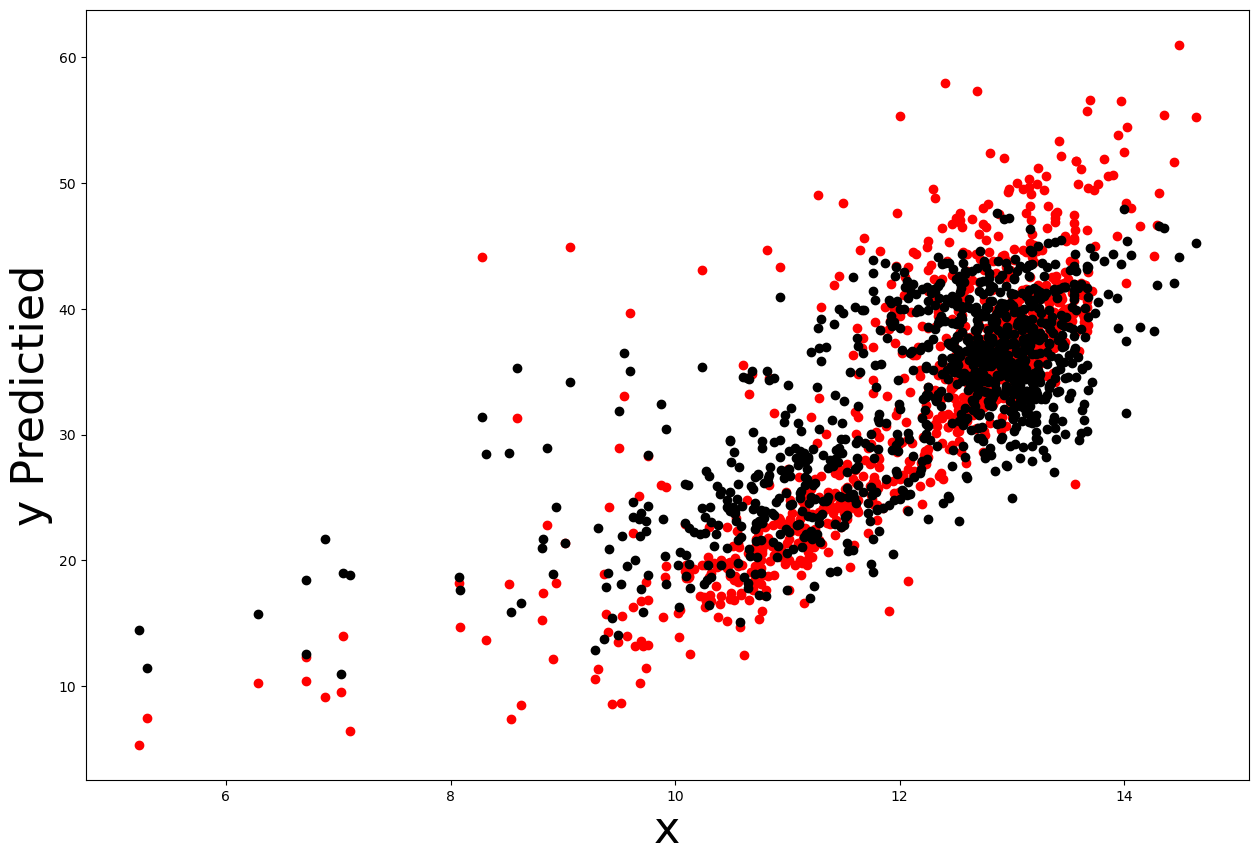

In [87]:
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch.autograd import Variable
import imageio

class CustomActivation(nn.Module):
    def forward(self, x):
        return x**2

x_plot, y_plot = features[:,0].cpu().numpy(), target.cpu().numpy()

# Convert X and y to tracked variables
x = Variable(features)
y = Variable(target)

in_dim = features.size()[1]
out_dim = 1

Net = torch.nn.Sequential(
      torch.nn.Linear(in_dim, 40),
      torch.nn.SiLU(),
      torch.nn.Linear(40, out_dim))

# summary(Net,(40, 1))

optimizer = torch.optim.Adam(Net.parameters(), lr = 0.001)
loss_function = torch.nn.MSELoss()

image_list = []
Niter = 1000 + 1

fig, ax = plt.subplots(figsize=(15,10))

# Create Training loop
for it in range(Niter):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if it % 100 == 0:
        print(f"Doing Iterations: {it} and Loss: {loss}")
    plt.cla()
    ax.set_xlabel('x', fontsize=32)
    ax.set_ylabel('y Predictied', fontsize=32)
    # ax.set_xlim(-1.5, 1.5)
    # ax.set_ylim(-0.5, 1.5)
    ax.scatter(x_plot, y_plot, color = "red")
    ax.scatter(x_plot, y_pred.data.numpy(), color = "black") #'k-', lw=4
    # ax.text(-0.5, 1.3, 'It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
    # ax.text(-0.1, 1.3, 'Loss = %.6f' % loss.data.numpy(),
    #         fontdict={'size': 22, 'color':  'black'})

    fig.canvas.draw()      
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    image_list.append(image)
    
   

imageio.mimsave('./Parabolic_regression_1.gif', image_list, fps=5)

## Single input single output

In [23]:
# Define an MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Set model parameters
input_size = features.shape[1]
hidden_size = 64
output_size = 1

# Create the model, loss function, and optimizer
model = MLP(input_size, hidden_size, output_size).to(device)
criterion = nn.MSELoss()  # You might want to use a different loss function based on your problem
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch [1/10000], Loss: 8.92306900024414
Epoch [2/10000], Loss: 8.923069953918457
Epoch [3/10000], Loss: 8.923070907592773
Epoch [4/10000], Loss: 8.923069953918457
Epoch [5/10000], Loss: 8.923069953918457
Epoch [6/10000], Loss: 8.923070907592773
Epoch [7/10000], Loss: 8.92306900024414
Epoch [8/10000], Loss: 8.923070907592773
Epoch [9/10000], Loss: 8.923069953918457
Epoch [10/10000], Loss: 8.923070907592773
Epoch [11/10000], Loss: 8.923069953918457
Epoch [12/10000], Loss: 8.923070907592773
Epoch [13/10000], Loss: 8.923069953918457
Epoch [14/10000], Loss: 8.92306900024414
Epoch [15/10000], Loss: 8.92306900024414
Epoch [16/10000], Loss: 8.923069953918457
Epoch [17/10000], Loss: 8.92306900024414
Epoch [18/10000], Loss: 8.923069953918457
Epoch [19/10000], Loss: 8.923070907592773
Epoch [20/10000], Loss: 8.923069953918457
Epoch [21/10000], Loss: 8.92306900024414
Epoch [22/10000], Loss: 8.92306900024414
Epoch [23/10000], Loss: 8.92306900024414
Epoch [24/10000], Loss: 8.923069953918457
Epoch [25

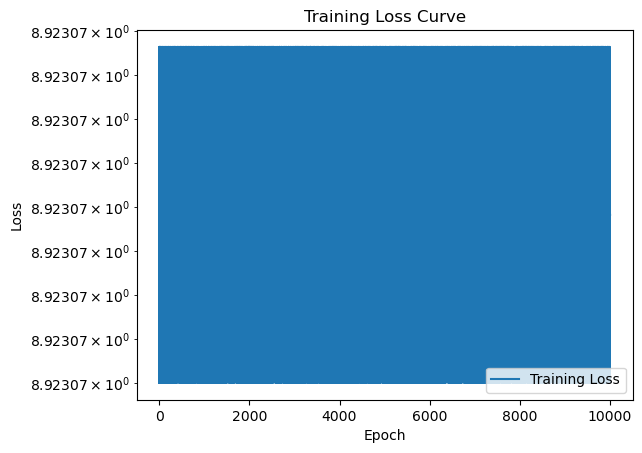

In [48]:
# Create DataLoader
dataset = TensorDataset(features, target)
dataloader = DataLoader(dataset, batch_size=features.size()[0], shuffle=True)

# Create an empty list to store training losses
training_losses = []

# Training loop
num_epochs = 10000

for epoch in range(num_epochs):
    epoch_losses = []  # List to store losses for each epoch

    for batch_features, batch_target in dataloader:
        batch_features, batch_target = batch_features.to(device), batch_target.to(device)
        
        
        output = model(batch_features).to(device) # Forward pass
        loss = criterion(output, batch_target)  # Compute the loss
        
        optimizer.zero_grad()  # Zero the gradients
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        epoch_losses.append(loss.item())  # Store the loss for this batch

    average_epoch_loss = sum(epoch_losses) / len(epoch_losses)
    training_losses.append(average_epoch_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_epoch_loss}')

# Plot the training loss curve
plt.semilogy(training_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

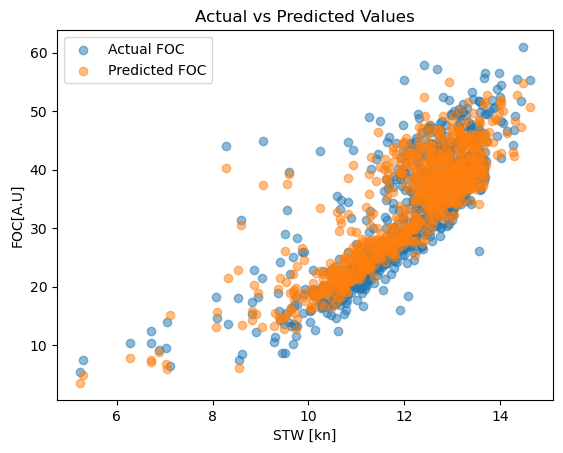

In [50]:
# Make predictions on the original features
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    predictions = model(features.to(device))

# Convert predictions and targets back to numpy arrays for comparison and plotting
predictions_np = predictions.cpu().numpy()
target_np = target.cpu().numpy()

# Plot original data and predicted values
# plt.scatter(features[:, 0].cpu().numpy(), target_np, label='Actual', alpha=0.7)
# plt.scatter(features[:, 0].cpu().numpy(), predictions, label='Predicted', alpha=0.7)
# plt.xlabel('Feature 1')
# plt.ylabel('Target')
# plt.title('Actual vs Predicted Values')
# plt.legend()
# plt.show()

# Plot original data and predicted values
plt.scatter(features[:, 0].cpu().numpy(), target_np, label='Actual FOC', alpha=0.5)
plt.scatter(features[:, 0].cpu().numpy(), predictions_np[:, 0], label='Predicted FOC', alpha=0.5)
# plt.scatter(features[:, 0].cpu().numpy(),computed_values, label=f'Predicted {A_value:.3f}*V^{B_value:.3f}', alpha=0.7)
# plt.plot(v_vector,A_value*v_vector**B_value, label=f'Predicted {A_value:.3f}*V^{B_value:.3f}', alpha=0.5,color='red')

plt.xlabel('STW [kn]')
plt.ylabel('FOC[A.U]')
plt.title('Actual vs Predicted Values')
plt.legend()

### Three outputs FOC, A & B 

In [72]:
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch.autograd import Variable
import imageio

# Define an updated model_2 with separate linear layers and output mappings
class CustomModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(CustomModel, self).__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        # self.sigm = nn.Sigmoid()

        # Separate linear layers for each output
        self.fc_target = nn.Linear(hidden_size, 1)
        self.fc_a = nn.Linear(hidden_size, 1)
        self.fc_b = nn.Linear(hidden_size, 1)

        # Sigmoid activation to map the output to [0, 3]
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        # x = self.sigm(x)

        # Separate linear layers for each output
        output_target = self.fc_target(x)
        output_a = self.a+self.fc_a(x)
        output_b = self.b+self.fc_b(x)

        # Apply sigmoid to map the outputs to [0, 3]
        # output_target =50 * self.sigmoid(output_target)   # map the outputs to [0, 50]
        output_a = 3 * self.sigmoid(output_a)   # map the outputs to [0, 3]
        output_b = 3 * self.sigmoid(output_b)   # map the outputs to [0, 3]

        return torch.cat([output_target, output_a, output_b], dim=1)

Epoch [1/1000], Loss: 3309.068115234375
Epoch [2/1000], Loss: 3132.447998046875
Epoch [3/1000], Loss: 2962.049072265625
Epoch [4/1000], Loss: 2797.956298828125
Epoch [5/1000], Loss: 2640.035400390625
Epoch [6/1000], Loss: 2488.01513671875
Epoch [7/1000], Loss: 2341.90966796875
Epoch [8/1000], Loss: 2201.677734375
Epoch [9/1000], Loss: 2067.221923828125
Epoch [10/1000], Loss: 1938.3907470703125
Epoch [11/1000], Loss: 1815.208251953125
Epoch [12/1000], Loss: 1697.536865234375
Epoch [13/1000], Loss: 1585.22412109375
Epoch [14/1000], Loss: 1478.1236572265625
Epoch [15/1000], Loss: 1376.3211669921875
Epoch [16/1000], Loss: 1279.780029296875
Epoch [17/1000], Loss: 1188.2628173828125
Epoch [18/1000], Loss: 1101.726318359375
Epoch [19/1000], Loss: 1019.9675903320312
Epoch [20/1000], Loss: 942.8809814453125
Epoch [21/1000], Loss: 870.3985595703125
Epoch [22/1000], Loss: 802.3064575195312
Epoch [23/1000], Loss: 738.5043334960938
Epoch [24/1000], Loss: 678.88330078125
Epoch [25/1000], Loss: 623.3

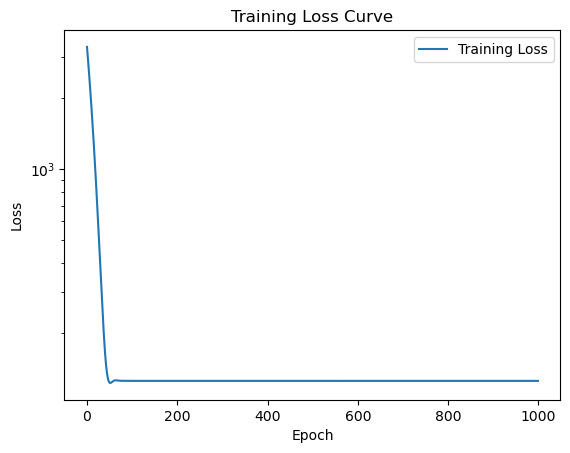

In [51]:
# Set model_2 parameters
input_size = features.shape[1]
hidden_size = 16
# num_hidden_layers=3

# Create the model, loss function, and optimizer
model_2 = CustomModel(input_size, hidden_size).to(device)
criterion = nn.MSELoss()  # You might want to use a different loss function based on your problem
optimizer = optim.Adam(model_2.parameters(), lr=1e-3)

# Add a learning rate scheduler: ReduceLROnPlateau
# Adjust patience, factor, and other parameters as needed
lr_scheduler_LROnP = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=10, factor=0.1, verbose=True)


# Create DataLoader
dataset = TensorDataset(features, target)
dataloader = DataLoader(dataset, batch_size=1024, shuffle=True) # batch_size=features.size()[0]

# Training loop
num_epochs = 1000
training_losses = []

image_list = []

for epoch in range(num_epochs):
    epoch_losses = []  # List to store losses for each epoch

    for batch_features, batch_target in dataloader:
        batch_features, batch_target = batch_features.to(device), batch_target.to(device)
        
        output = model_2(Variable(batch_features)).to(device)  # Forward pass
        
        # Select the 'stw' feature
        # feature_index = feature_names.index('stw')
        # selected_feature = batch_features[:, feature_index]
    
        # Total loss is the sum of individual losses
        loss = criterion(output[:,0], batch_target)  # Compute the loss
        # loss = criterion(output[:,1]*batch_features[:,0]**output[:,2], batch_target)  # Compute the loss
        
        optimizer.zero_grad()  # Zero the gradients
        
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        epoch_losses.append(loss.item())  # Store the loss for this batch

    average_epoch_loss = sum(epoch_losses) / len(epoch_losses)
    training_losses.append(average_epoch_loss)    #average_epoch_loss

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_epoch_loss}')
    
    # Step the learning rate scheduler at the end of each epoch
    # lr_scheduler.step()
    lr_scheduler_LROnP.step(average_epoch_loss)
    
#     if epoch % 50 == 0:
#         print(f"Doing Iterations: {epoch} and Loss: {loss}")
#         plt.cla()
#     #     ax.set_xlabel('x', fontsize=32)
#     #     ax.set_ylabel('y Predictied', fontsize=32)
#     #     ax.set_xlim(-1.5, 1.5)
#     #     ax.set_ylim(-0.5, 1.5)
#         ax.scatter(batch_features, batch_target, color = "red")
#         ax.plot(batch_features, output[:,1]*batch_features**output[:,2], 'k-', lw=4)
#     #     ax.text(-0.5, 1.3, 'It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
#     #     ax.text(-0.1, 1.3, 'Loss = %.6f' % loss.data.numpy(),
#     #             fontdict={'size': 22, 'color':  'black'})

# #     fig.canvas.draw()      
# #     image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
# #     image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

# #     image_list.append(image)
    
   

# imageio.mimsave('./Parabolic_regression_1.gif', image_list, fps=5)

# Plot the training loss curve
plt.semilogy(training_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

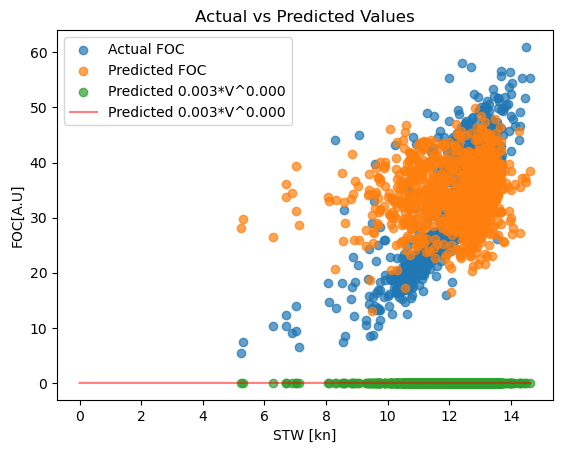

In [52]:
# Make predictions on the original features
with torch.no_grad():
    model_2.eval()  # Set the model to evaluation mode
    predictions = model_2(features.to(device))

# Convert predictions and targets back to numpy arrays for comparison and plotting
predictions_np = predictions.cpu().numpy()
target_np = target.cpu().numpy()

# Plot original data, predicted values, and computed values
predicted_a = predictions_np[:, 1]
predicted_b = predictions_np[:, 2]

# computed_values = predicted_a * (features[:, 0].cpu().numpy()**predicted_b)
computed_values = predicted_a.mean() * (features[:, 0].cpu().numpy()**predicted_b.mean())

# Use variables for A and B when plotting
A_value = predicted_a.mean()
B_value = predicted_b.mean()

v_vector=np.linspace(0,max_val,100)

# Plot original data and predicted values
plt.scatter(features[:, 0].cpu().numpy(), target_np, label='Actual FOC', alpha=0.7)
plt.scatter(features[:, 0].cpu().numpy(), predictions_np[:, 0], label='Predicted FOC', alpha=0.7)
plt.scatter(features[:, 0].cpu().numpy(),computed_values, label=f'Predicted {A_value:.3f}*V^{B_value:.3f}', alpha=0.7)
plt.plot(v_vector,A_value*v_vector**B_value, label=f'Predicted {A_value:.3f}*V^{B_value:.3f}', alpha=0.5,color='red')

plt.xlabel('STW [kn]')
plt.ylabel('FOC[A.U]')
plt.title('Actual vs Predicted Values')
plt.legend()

# plt.xlim([0, max_val])    #[min_val, max_val]
# plt.ylim([0, 50])

#### Two loss functions

/home/metwally/anaconda3/envs/pinn_modulus/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([998, 1])) that is different to the input size (torch.Size([998])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/10000], Loss: 3706.80419921875
Epoch [2/10000], Loss: 2495.259765625
Epoch [3/10000], Loss: 1583.5394287109375
Epoch [4/10000], Loss: 1002.5247802734375
Epoch [5/10000], Loss: 662.1175537109375
Epoch [6/10000], Loss: 531.679443359375
Epoch [7/10000], Loss: 562.04541015625
Epoch [8/10000], Loss: 683.392822265625
Epoch [9/10000], Loss: 819.9424438476562
Epoch [10/10000], Loss: 914.7188720703125
Epoch [11/10000], Loss: 945.949951171875
Epoch [12/10000], Loss: 918.1199951171875
Epoch [13/10000], Loss: 848.8204345703125
Epoch [14/10000], Loss: 759.1669921875
Epoch [15/10000], Loss: 667.9977416992188
Epoch [16/10000], Loss: 589.1248168945312
Epoch [17/10000], Loss: 530.7283935546875
Epoch [18/10000], Loss: 495.6090087890625
Epoch [19/10000], Loss: 482.11602783203125
Epoch [20/10000], Loss: 485.59906005859375
Epoch [21/10000], Loss: 500.058837890625
Epoch [22/10000], Loss: 519.3123779296875
Epoch [23/10000], Loss: 537.9462890625
Epoch [24/10000], Loss: 551.9965209960938
Epoch [25/100

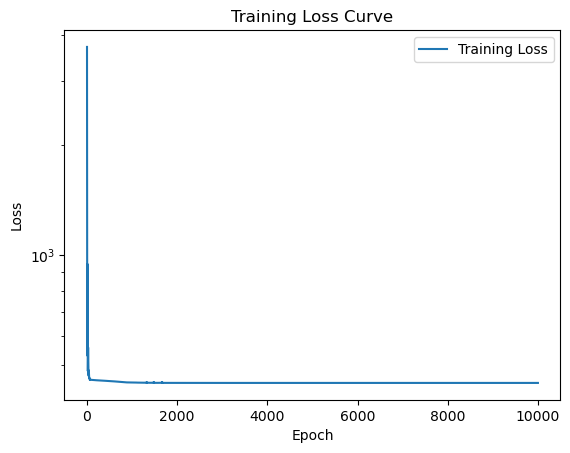

In [73]:


# class CustomLoss(nn.Module):
#     def __init__(self):
#         super(CustomLoss, self).__init__()

#     def forward(self, prediction, target, a=0.1, b=2):
#         # Calculate the custom loss as the mean squared error between a*V^b and the target
#         loss = F.mse_loss(a * torch.pow(prediction, b), target)
#         return loss

# Set model_2 parameters
input_size = features.shape[1]
hidden_size = 16
# num_hidden_layers=3

# Create the model, loss function, and optimizer
model_2 = CustomModel(input_size, hidden_size).to(device)
# model_2 = CustomModel(input_size, hidden_size, num_hidden_layers).to(device)
criterion = nn.MSELoss()  # You might want to use a different loss function based on your problem
optimizer = optim.Adam(model_2.parameters(), lr=9e-3)

# Instantiate the custom loss function
# custom_loss = CustomLoss()

# Add a learning rate scheduler
# Here, I'm using StepLR as an example. You can choose a different scheduler based on your requirements.
# StepLR decreases the learning rate by a factor gamma every step_size epochs.
# scheduler_step_size = 30  # You can adjust these parameters based on your needs
# scheduler_gamma = 0.1
# lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=scheduler_step_size, gamma=scheduler_gamma)
# Add a learning rate scheduler: ReduceLROnPlateau
# Adjust patience, factor, and other parameters as needed
lr_scheduler_LROnP = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=100, factor=0.5, verbose=True)


# Create DataLoader
dataset = TensorDataset(features, target)
dataloader = DataLoader(dataset, batch_size=1024, shuffle=True) # batch_size=features.size()[0]

# Training loop
num_epochs = 10000
training_losses = []


for epoch in range(num_epochs):
    epoch_losses = []  # List to store losses for each epoch

    for batch_features, batch_target in dataloader:
        batch_features, batch_target = batch_features.to(device), batch_target.to(device)
        
        output = model_2(Variable(batch_features)).to(device)  # Forward pass
        loss_A = criterion(output[:,0], batch_target)  # Compute the loss
        # loss_A = criterion(output[:,1]*torch.pow(output[:,0],output[:,2]), batch_target)  # Compute the loss
        # loss_A = custom_loss(output[:,0], batch_target,output[:,1],output[:,2])  # Compute the loss
        loss_BC = criterion(output[:,1]*batch_features[:,0]**output[:,2], batch_target)  # Compute the loss
        # Total loss is the sum of individual losses
        loss = 1*loss_A+ 0.3*loss_BC
        
        optimizer.zero_grad()  # Zero the gradients
        
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        epoch_losses.append(loss.item())  # Store the loss for this batch

    average_epoch_loss = sum(epoch_losses) / len(epoch_losses)
    training_losses.append(average_epoch_loss)    #average_epoch_loss

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_epoch_loss}')
    
    # Step the learning rate scheduler at the end of each epoch
    # lr_scheduler.step()
    lr_scheduler_LROnP.step(average_epoch_loss)

# Plot the training loss curve
plt.semilogy(training_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()


(0.0, 50.0)

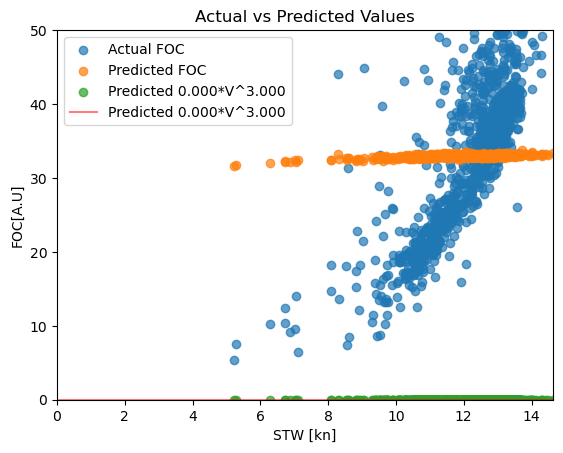

In [74]:
# Make predictions on the original features
with torch.no_grad():
    model_2.eval()  # Set the model to evaluation mode
    predictions = model_2(features.to(device))

# Convert predictions and targets back to numpy arrays for comparison and plotting
predictions_np = predictions.cpu().numpy()
target_np = target.cpu().numpy()

# Plot original data, predicted values, and computed values
predicted_a = predictions_np[:, 1]
predicted_b = predictions_np[:, 2]

# computed_values = predicted_a * (features[:, 0].cpu().numpy()**predicted_b)
computed_values = predicted_a.mean() * (features[:, 0].cpu().numpy()**predicted_b.mean())

# Use variables for A and B when plotting
A_value = predicted_a.mean()
B_value = predicted_b.mean()

v_vector=np.linspace(0,max_val,100)

# Plot original data and predicted values
plt.scatter(features[:, 0].cpu().numpy(), target_np, label='Actual FOC', alpha=0.7)
plt.scatter(features[:, 0].cpu().numpy(), predictions_np[:, 0], label='Predicted FOC', alpha=0.7)
plt.scatter(features[:, 0].cpu().numpy(),computed_values, label=f'Predicted {A_value:.3f}*V^{B_value:.3f}', alpha=0.7)
plt.plot(v_vector,A_value*v_vector**B_value, label=f'Predicted {A_value:.3f}*V^{B_value:.3f}', alpha=0.5,color='red')

plt.xlabel('STW [kn]')
plt.ylabel('FOC[A.U]')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.xlim([0, max_val])    #[min_val, max_val]
plt.ylim([0, 50])

In [ ]:
# -*- coding: utf-8 -*-
import random
import torch
import math


class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 4, 5
        and reuse the e parameter to compute the contribution of these orders.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same parameter many
        times when defining a computational graph.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = DynamicNet()

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

1999 1098.43896484375
3999 514.3084106445312
5999 234.93284606933594
7999 110.37388610839844
9999 55.987449645996094
11999 30.304677963256836
13999 18.717981338500977
15999 13.304182052612305
17999 10.948911666870117
19999 9.599520683288574
21999 9.270560264587402
23999 8.860437393188477
25999 8.948318481445312
27999 8.908323287963867
29999 8.57696533203125
Result: y = 0.004758352879434824 + 0.8548507690429688 x + -0.0013398093869909644 x^2 + -0.09342414885759354 x^3 + 0.00012715498451143503 x^4 ? + 0.00012715498451143503 x^5 ?


In [ ]:
# -*- coding: utf-8 -*-
import torch
import math


class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined 
# with torch.nn.Parameter) which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 1351.6416015625
199 919.6128540039062
299 627.2556762695312
399 429.20562744140625
499 294.89892578125
599 203.7206573486328
699 141.75332641601562
799 99.59162139892578
899 70.87300872802734
999 51.28901672363281
1099 37.91889953613281
1199 28.780466079711914
1299 22.527307510375977
1399 18.243459701538086
1499 15.305408477783203
1599 13.288007736206055
1699 11.901264190673828
1799 10.94690990447998
1899 10.289432525634766
1999 9.83596420288086
Result: y = -0.027810771018266678 + 0.8391228914260864 x + 0.004797819070518017 x^2 + -0.09082438796758652 x^3
